In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Data Loading

In [3]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projects/ml projects/6_System Threat Forecaster_p3/Train.csv")
test_feat=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projects/ml projects/6_System Threat Forecaster_p3/Test.csv")

In [4]:
train.shape

(100000, 76)

In [5]:
train.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   
3                     0            46413.0                            2.0   
4                     0            40466.0                            2.0   

   ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  IsPenCapable  \
0  ...                    0              0.0               1             0   
1  ...                    1              0.0               0             0   
2  ...                    0              0.0               0             0   
3  ...                    1              0.0               0             0   
4  ...                    0              0.0               0             0   

   IsAlwaysOnAlwaysConnectedCapable  IsGamer RegionIdentifier  \
0                               1.0      0.0              6.0   
1                               0.0      0.0             10.0   
2                               0.0      1.0              6.0   
3                               0.0      0.0             12.0   
4                               0.0      1.0              7.0   

                DateAS      DateOS  target  
0  2018-09-10 10:11:00  2018-04-17       0  
1  2018-08-16 00:01:00  2018-08-14       1  
2  2018-09-20 23:20:00  2018-09-11       1  
3  2018-09-14 00:32:00  2018-01-03       1  
4  2018-09-15 19:34:00  2018-09-11       0  

[5 rows x 76 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [7]:
train.describe()

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                       1.000000   
50%         53447.000000                       1.000000   
75%         53447.000000                       2.000000   
max         70490.000000                       5.000000   

       NumAntivirusProductsEnabled         HasTpm      CountryID  \
count                 99924.000000  100000.000000  100000.000000   
mean                      1.018264       0.996780     108.078790   
std                       0.155291       0.056654      63.062151   
min                       0.000000       0.000000       1.000000   
25%                       1.000000       1.000000      51.000000   
50%                       1.000000       1.000000      97.000000   
75%                       1.000000       1.000000     162.000000   
max                       4.000000       1.000000     222.000000   

              CityID    GeoRegionID  ...  FirmwareManufacturerID  \
count   99377.000000  100000.000000  ...            99624.000000   
mean    81029.938587     169.741630  ...              401.987613   
std     48944.027074      89.188929  ...              221.318891   
min         7.000000       1.000000  ...                2.000000   
25%     36694.000000      89.000000  ...              142.000000   
50%     82373.000000     181.000000  ...              500.000000   
75%    122835.000000     267.000000  ...              556.000000   
max    167957.000000     296.000000  ...             1083.000000   

       FirmwareVersionID  IsSecureBootEnabled  IsVirtualDevice  \
count       99666.000000        100000.000000     99980.000000   
mean        32942.648044             0.495690         0.003841   
std         21151.970827             0.499984         0.061855   
min           121.000000             0.000000         0.000000   
25%         13020.000000             0.000000         0.000000   
50%         33066.000000             0.000000         0.000000   
75%         52357.000000             1.000000         0.000000   
max         72091.000000             1.000000         1.000000   

       IsTouchEnabled   IsPenCapable  IsAlwaysOnAlwaysConnectedCapable  \
count   100000.000000  100000.000000                      99866.000000   
mean         0.128470       0.040580                          0.058398   
std          0.334614       0.197316                          0.234496   
min          0.000000       0.000000                          0.000000   
25%          0.000000       0.000000                          0.000000   
50%          0.000000       0.000000                          0.000000   
75%          0.000000       0.000000                          0.000000   
max          1.000000       1.000000                          1.000000   

            IsGamer  RegionIdentifier         target  
count  99441.000000      99441.000000  100000.000000  
mean       0.296668          7.875866       0.505250  
std        0.456791          4.562533       0.499975  
min        0.000000          1.000000       0.000000  
25%        0.000000          3.000000       0.000000  
50%        0.000000         10.000000       

In [8]:
train.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [9]:
cat_col=[i for i in train.columns if train[i].dtypes=='object']
num_col=[i for i in train.columns if i not in cat_col]

In [10]:
col_less10=[i for i in cat_col if train[i].nunique()<10]

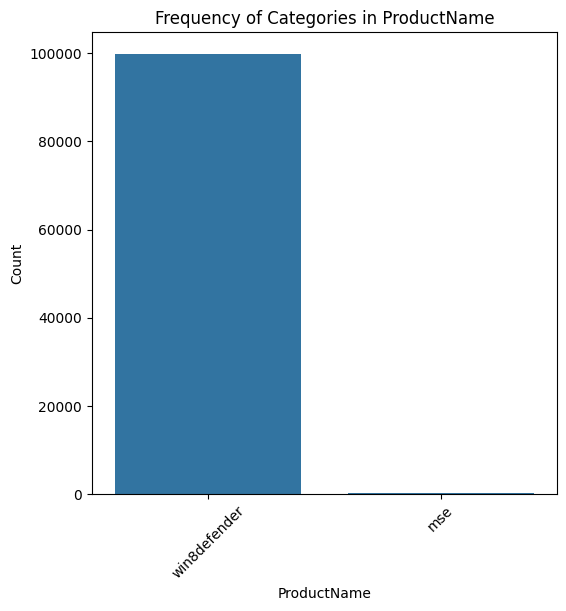

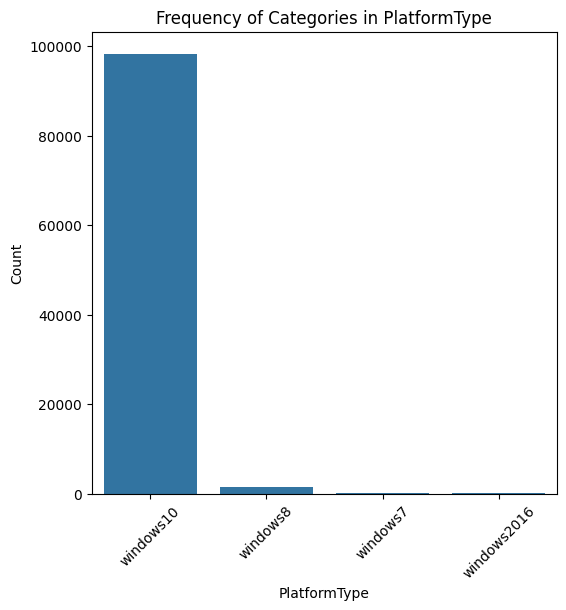

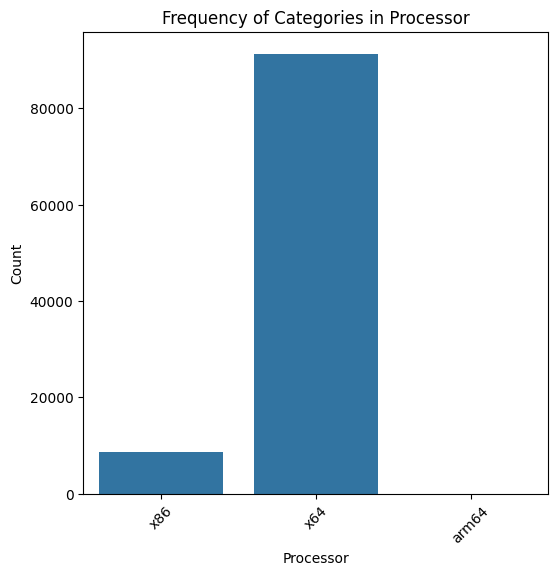

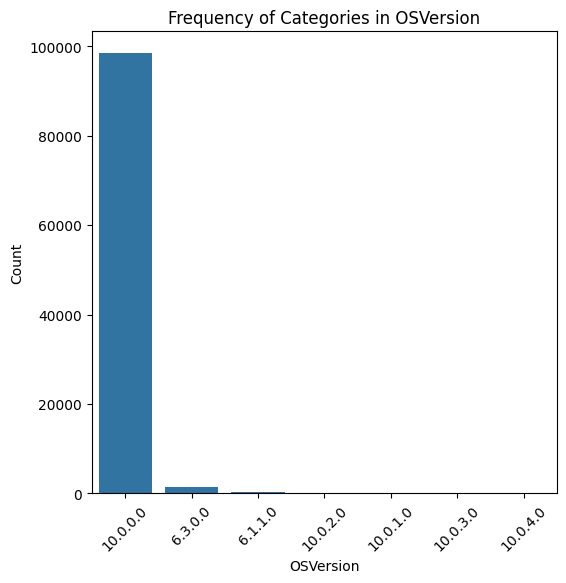

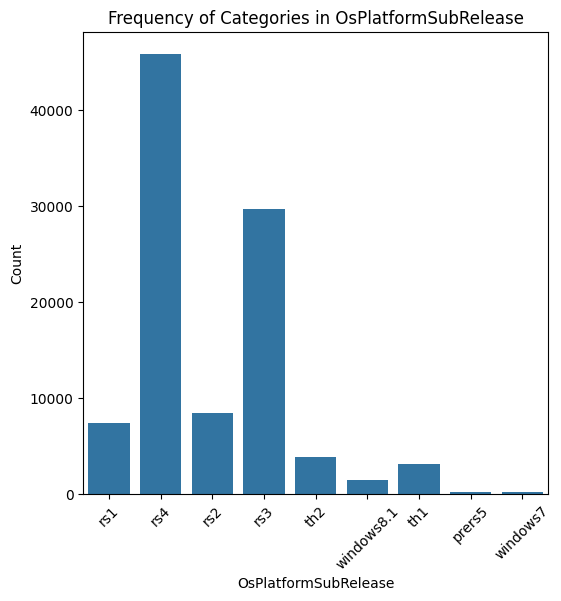

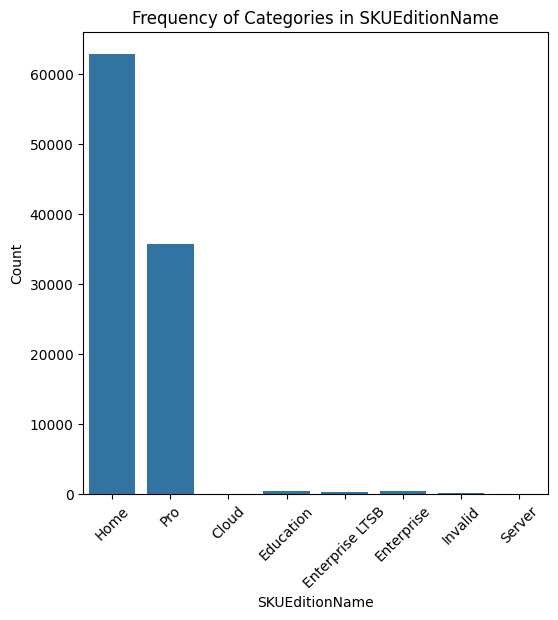

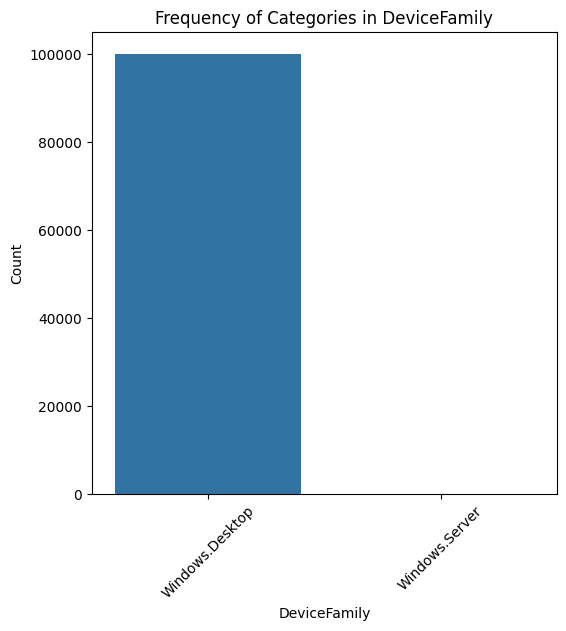

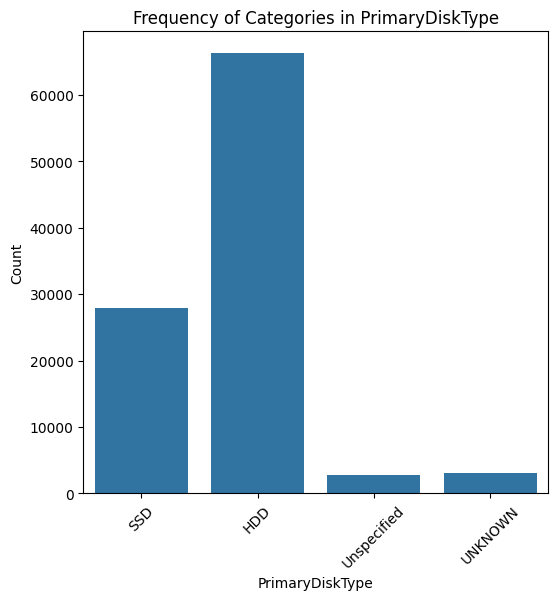

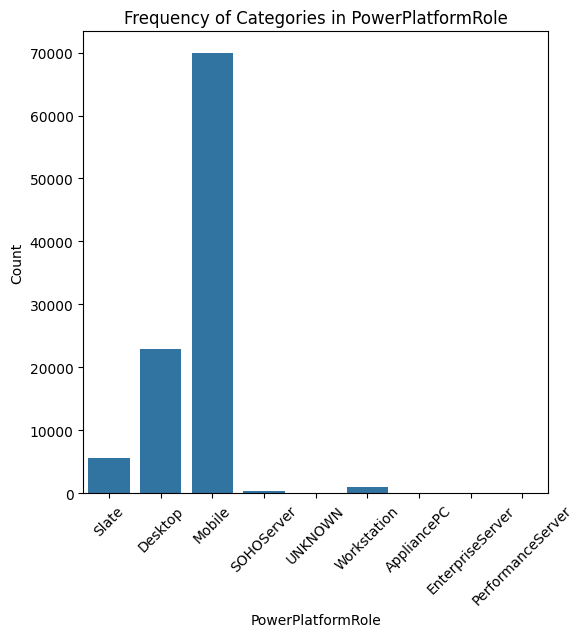

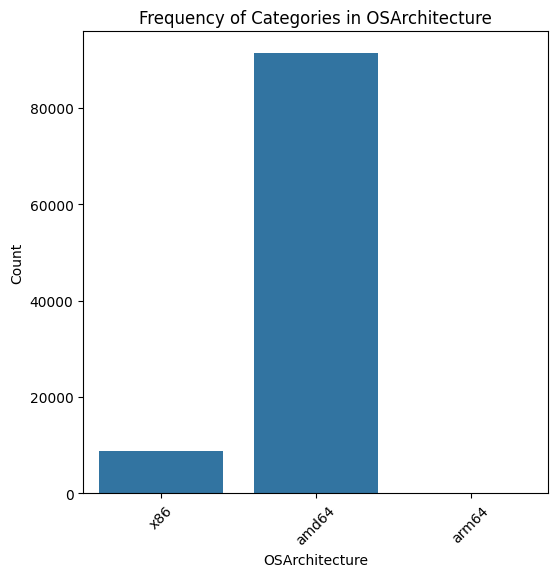

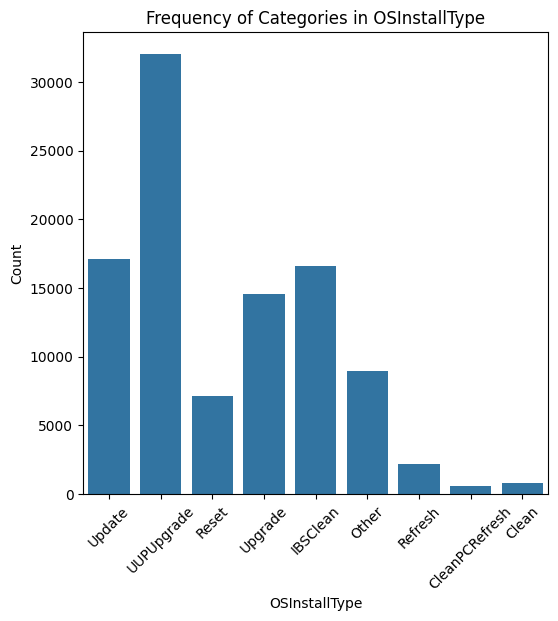

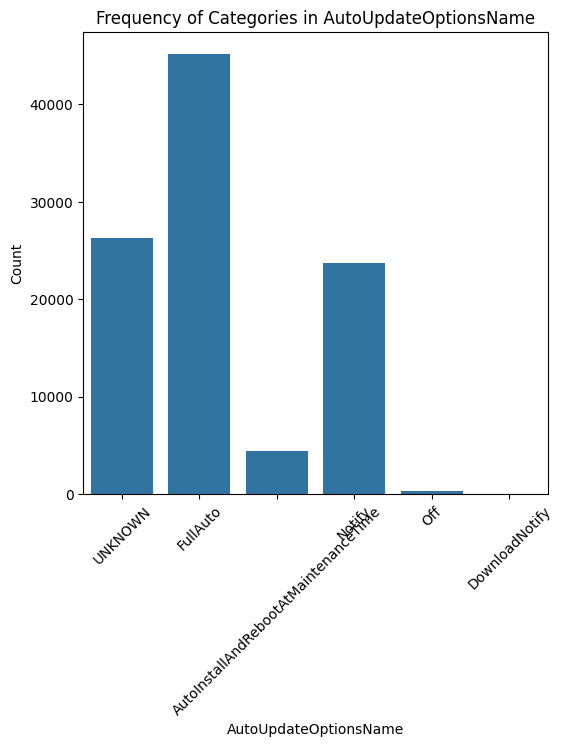

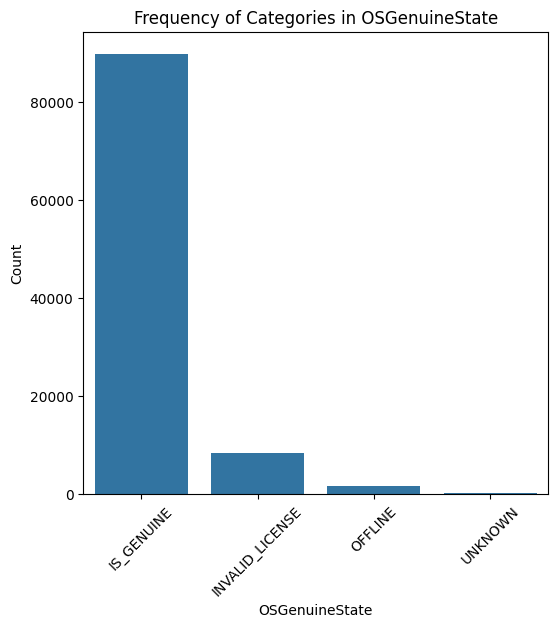

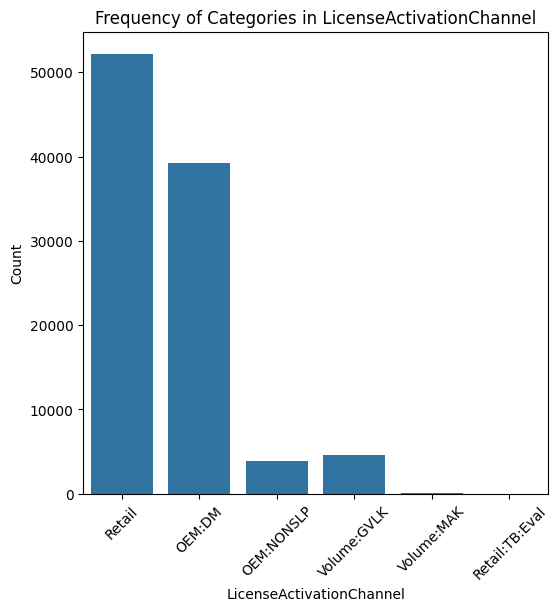

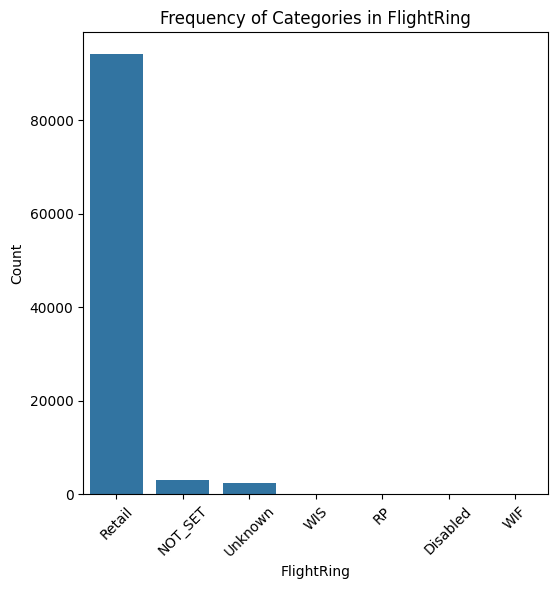

In [11]:
for col in col_less10:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=col, data=train)
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
for col in cat_col:
    print(f"Value counts for {col}:\n{train[col].value_counts()}\n")


Value counts for MachineID:
MachineID
a9471e295bff5eb8a5ec9e6361204caa    2
785c1802531fce4d330a0bdc948d00f3    2
20ffed36ab31342ddf24afcb6c476480    2
f8648fc5adc97aa2d740469e7418c3ee    2
e4a51982d9bf4703f836b89410d8cd71    2
                                   ..
ae184124b12bea48314e33a60e1b0592    1
83e2712e9f079e8f9278a9855c16f0c9    1
72c4d7c6ba52fe2defe8ad47c229c560    1
325620b3b8f64789e20fe2d5207f6641    1
cf2fb7a5a4fcfd5171bd5e0ec719846c    1
Name: count, Length: 99835, dtype: int64

Value counts for ProductName:
ProductName
win8defender    99771
mse               229
Name: count, dtype: int64

Value counts for EngineVersion:
EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
1.1.15000.2     3169
1.1.14901.4     2597
1.1.14800.3     1719
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      255
1.1.13504.0      212
1.1.14500.5      124
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.138

In [13]:
for col in cat_col:
    print(f"Cardinality of {col}: {train[col].nunique()}")


Cardinality of MachineID: 99835
Cardinality of ProductName: 2
Cardinality of EngineVersion: 37
Cardinality of AppVersion: 69
Cardinality of SignatureVersion: 2735
Cardinality of PlatformType: 4
Cardinality of Processor: 3
Cardinality of OSVersion: 7
Cardinality of OsPlatformSubRelease: 9
Cardinality of OSBuildLab: 281
Cardinality of SKUEditionName: 8
Cardinality of MDC2FormFactor: 11
Cardinality of DeviceFamily: 2
Cardinality of PrimaryDiskType: 4
Cardinality of ChassisType: 28
Cardinality of PowerPlatformRole: 9
Cardinality of NumericOSVersion: 221
Cardinality of OSArchitecture: 3
Cardinality of OSBranch: 13
Cardinality of OSEdition: 20
Cardinality of OSSkuFriendlyName: 18
Cardinality of OSInstallType: 9
Cardinality of AutoUpdateOptionsName: 6
Cardinality of OSGenuineState: 4
Cardinality of LicenseActivationChannel: 6
Cardinality of FlightRing: 7
Cardinality of DateAS: 2695
Cardinality of DateOS: 112


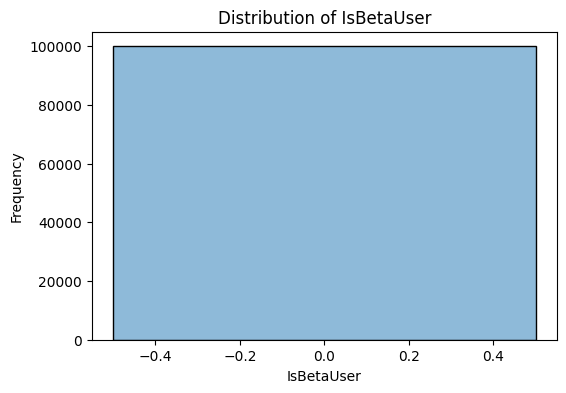

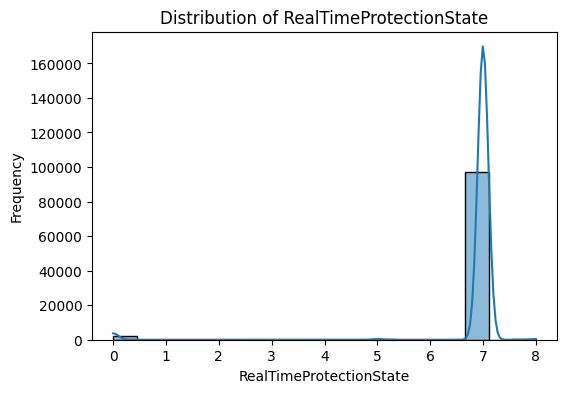

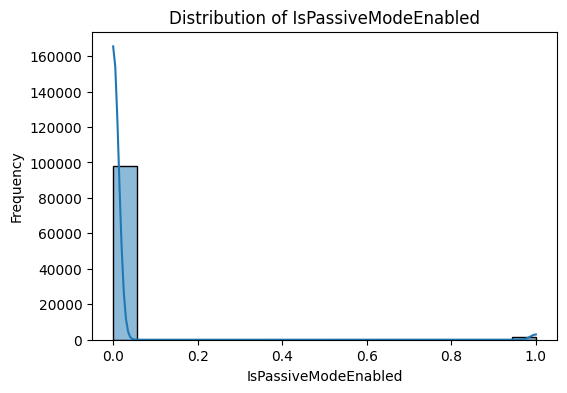

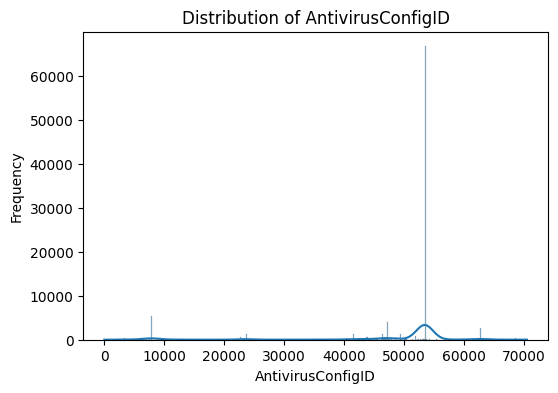

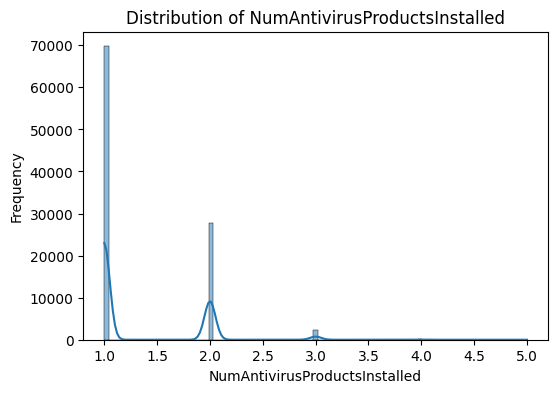

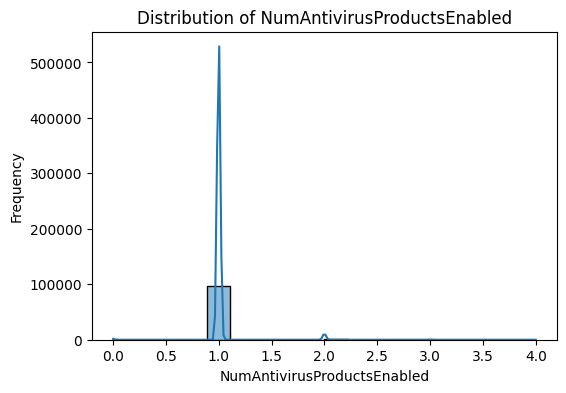

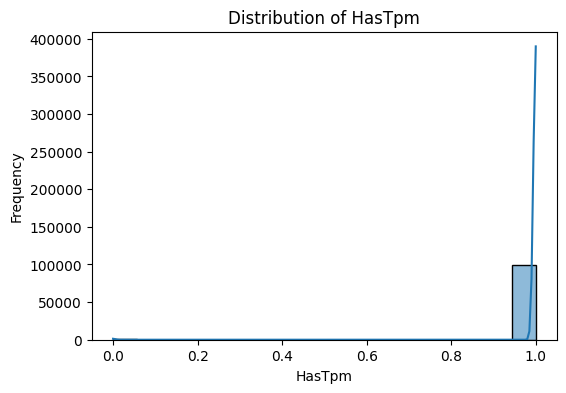

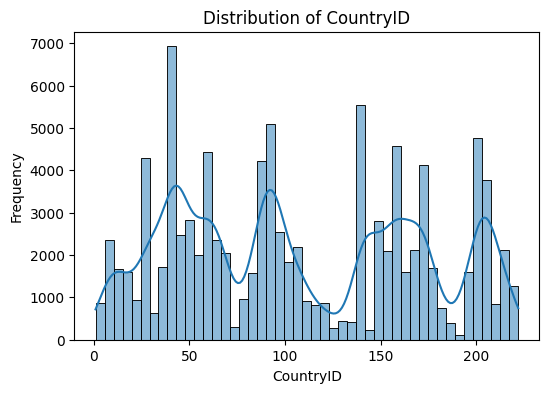

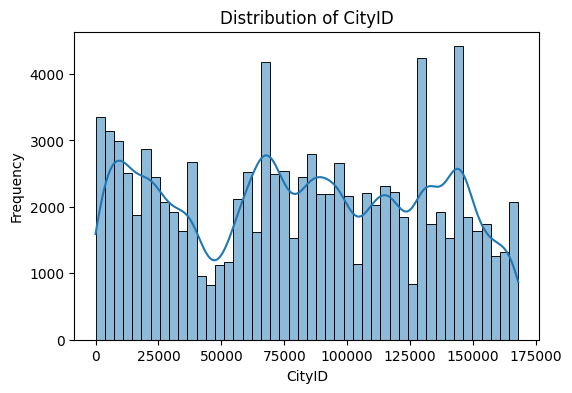

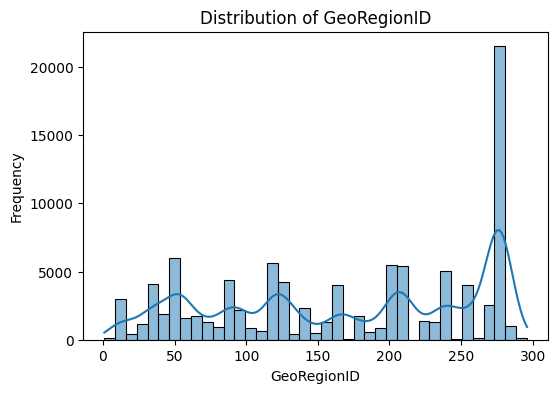

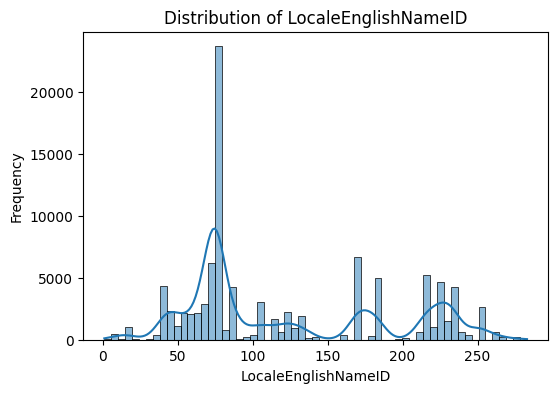

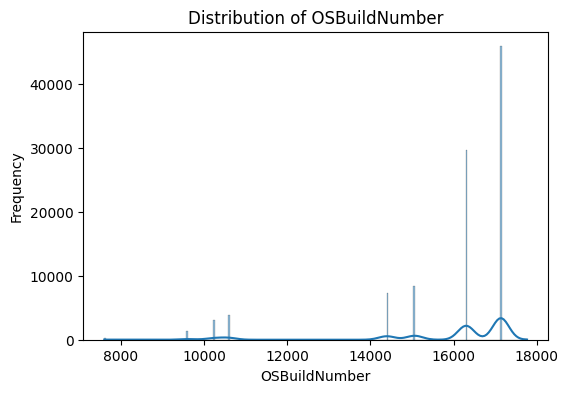

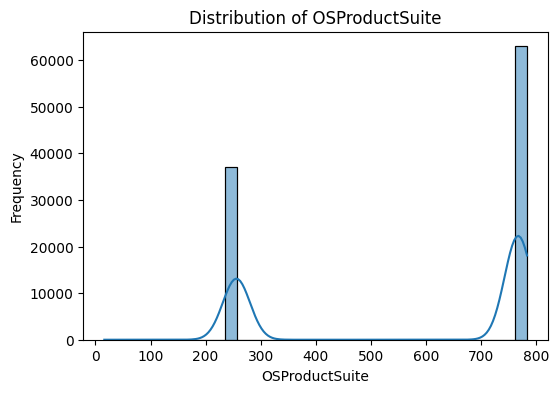

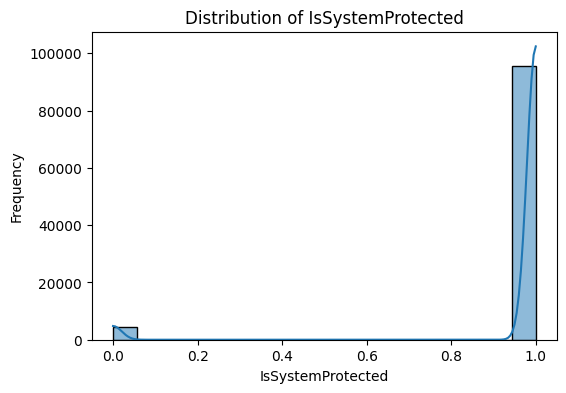

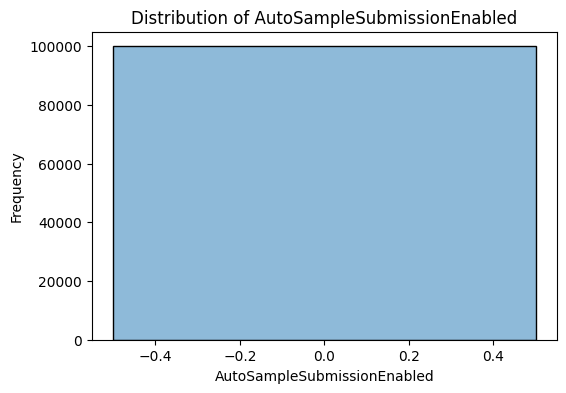

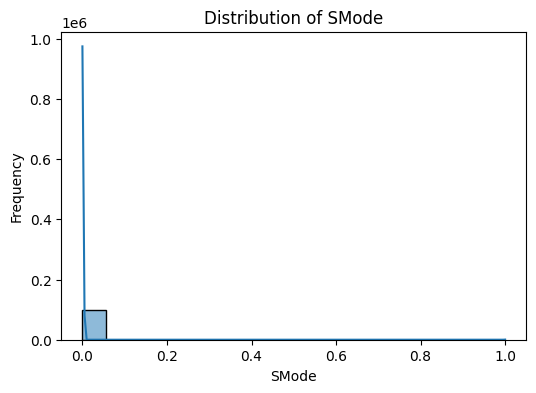

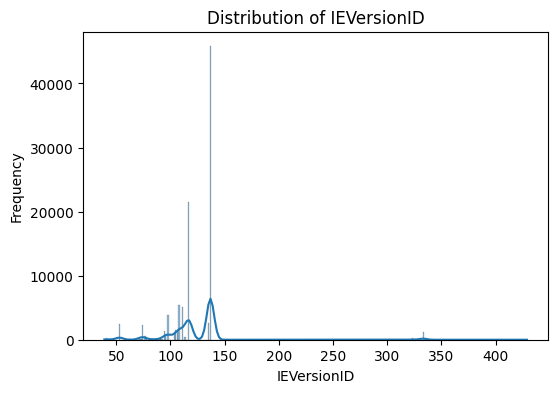

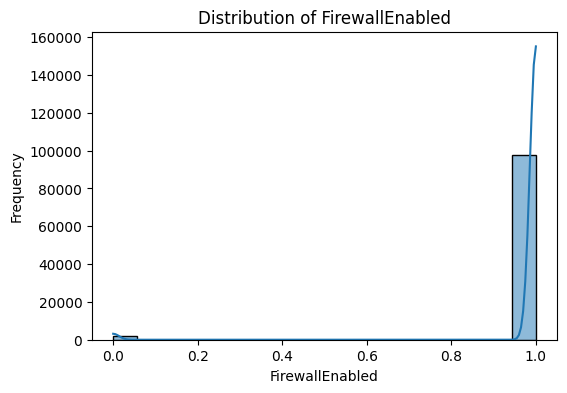

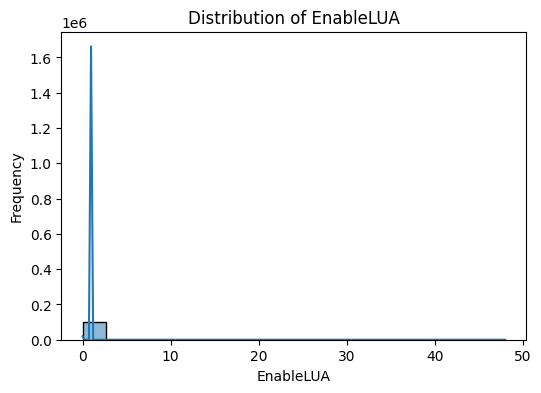

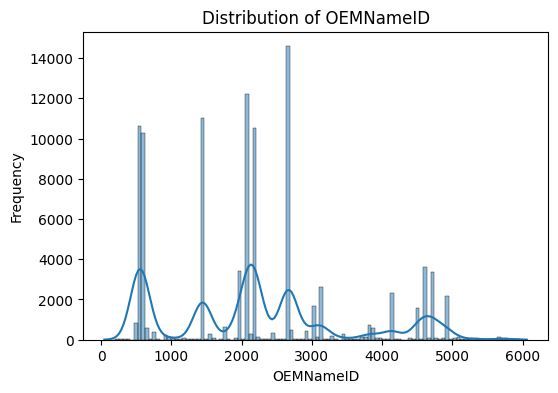

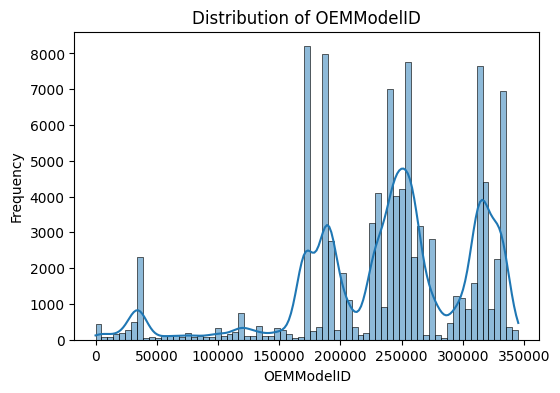

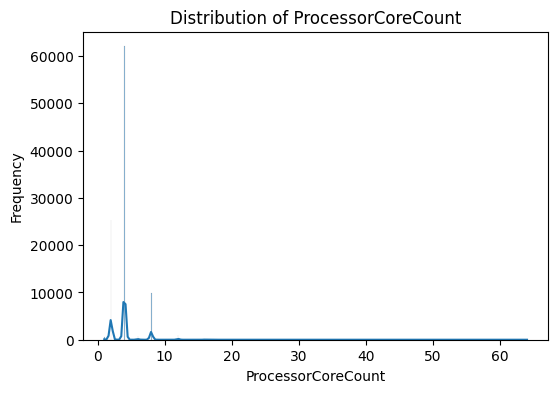

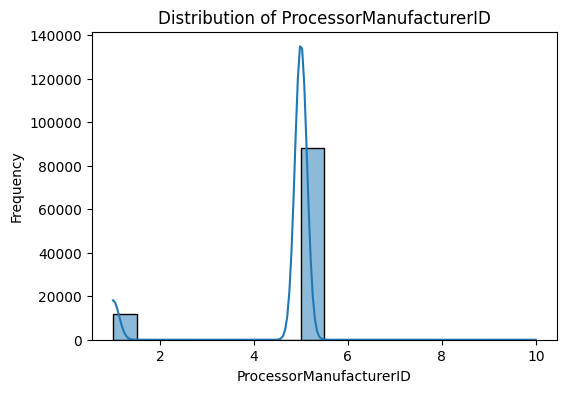

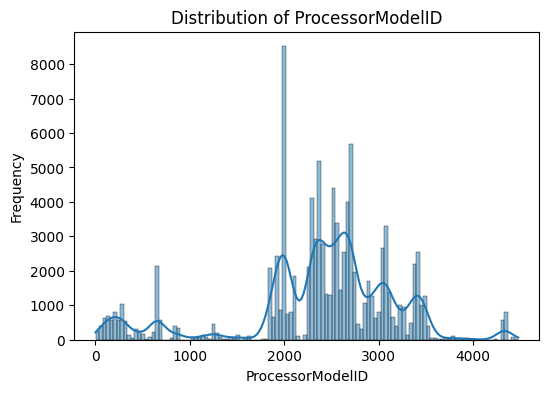

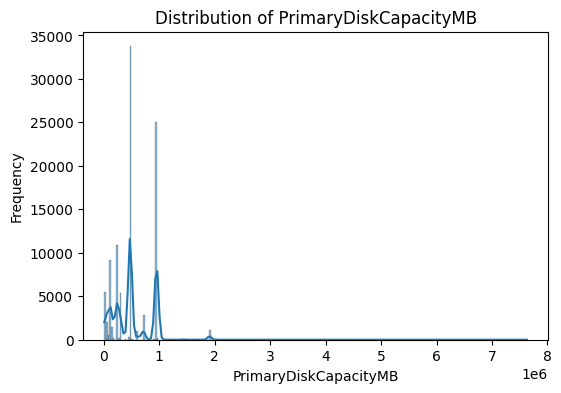

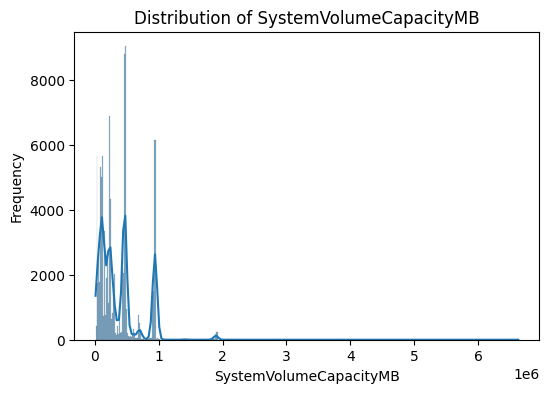

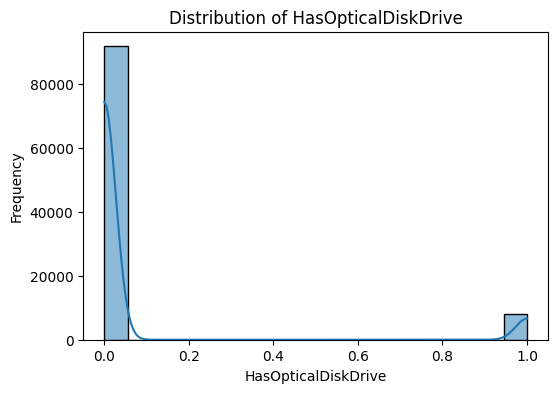

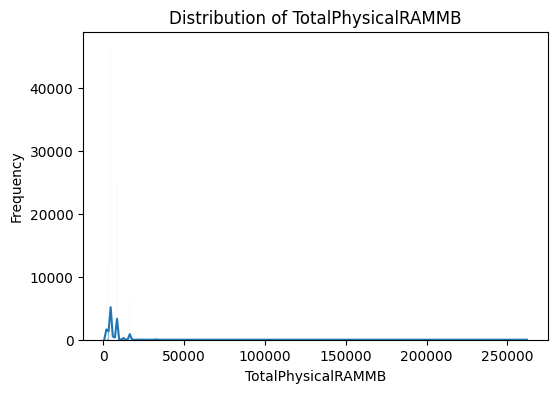

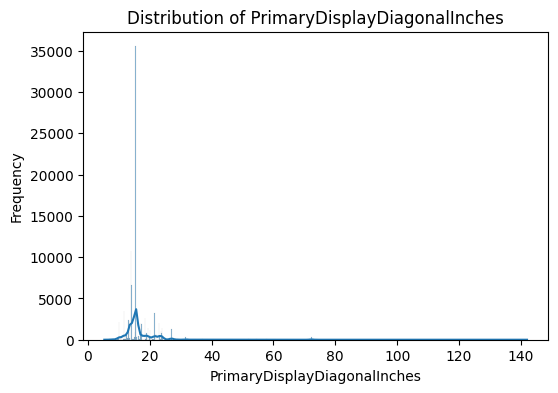

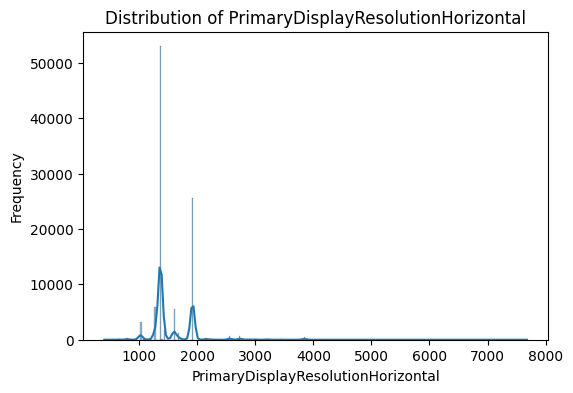

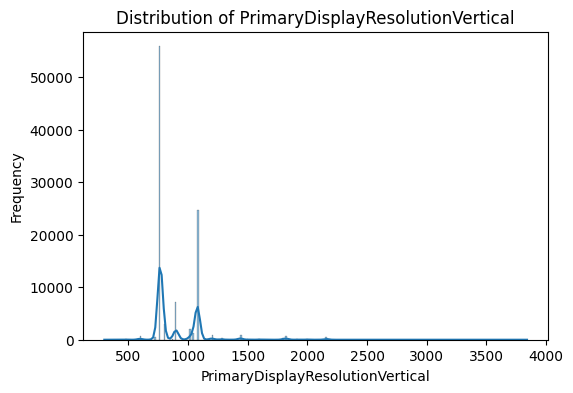

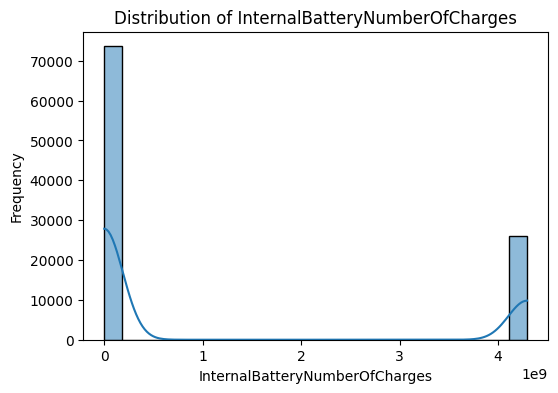

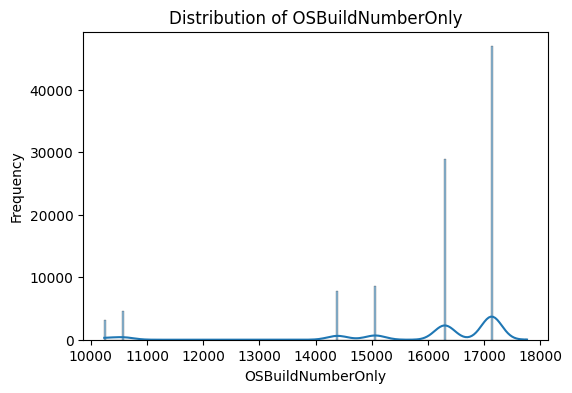

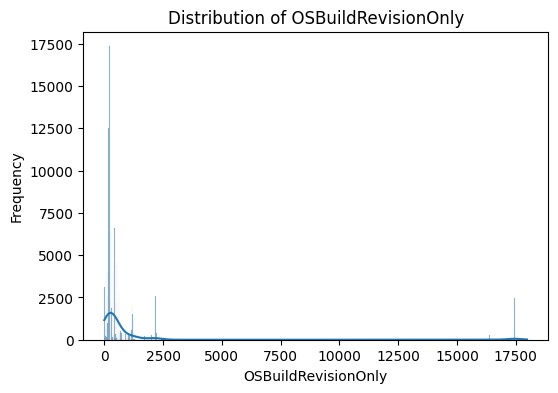

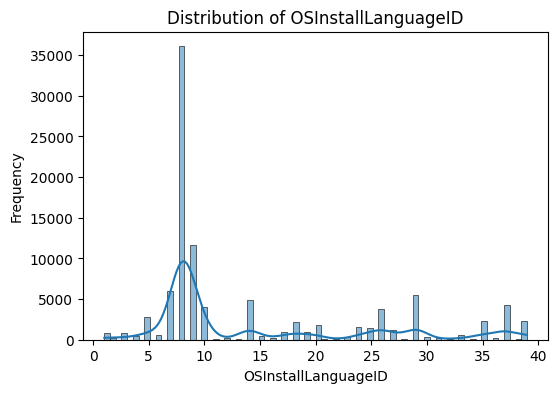

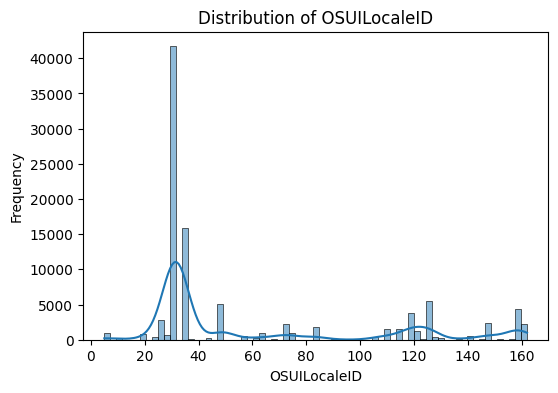

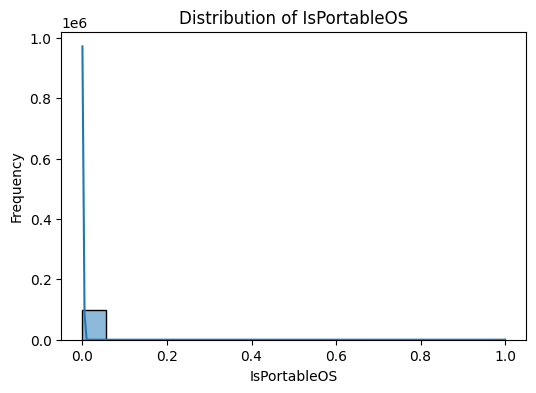

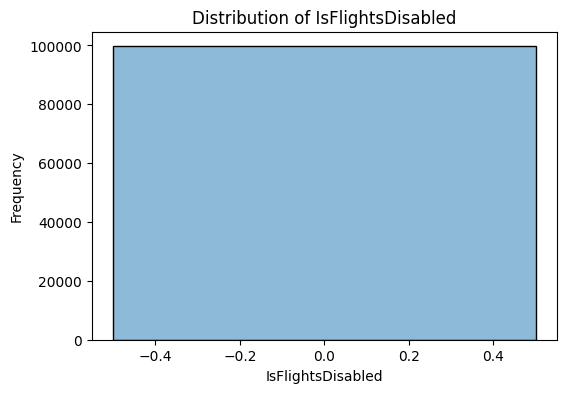

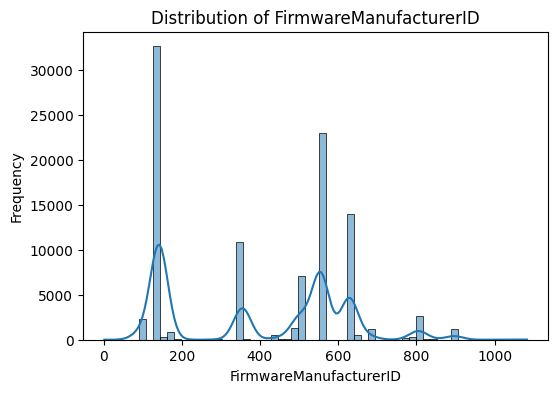

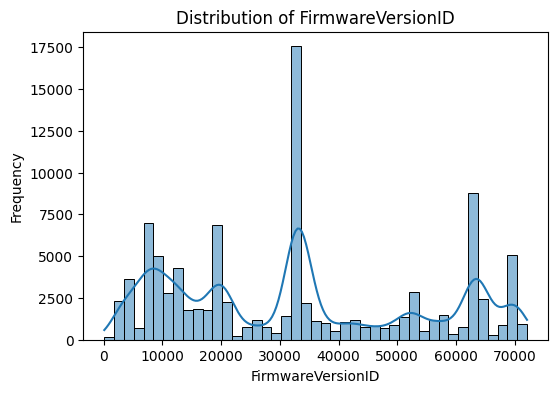

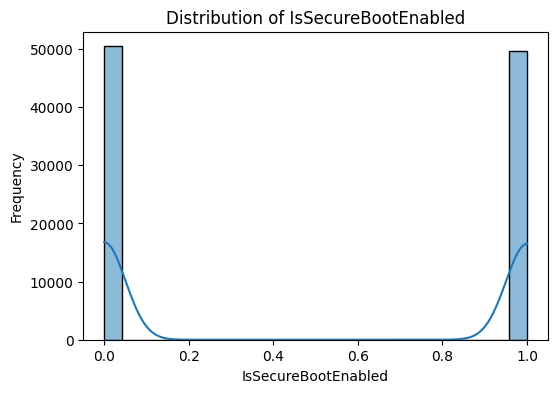

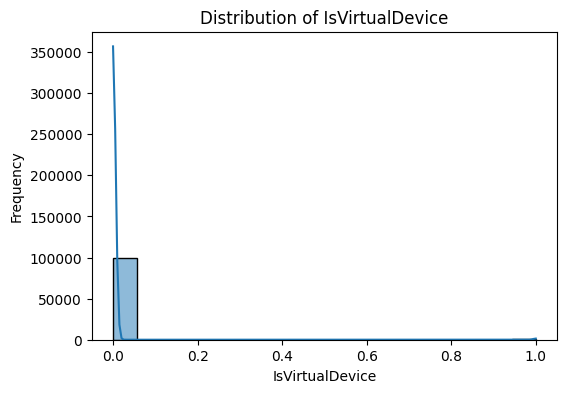

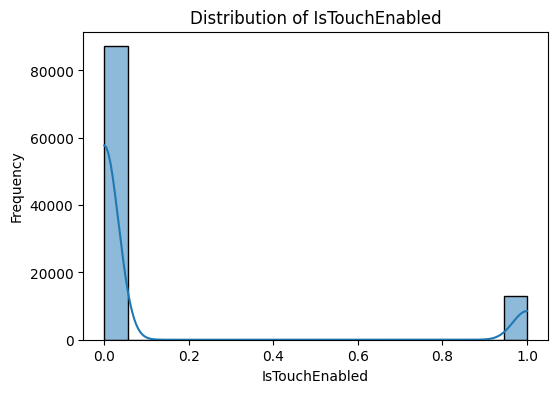

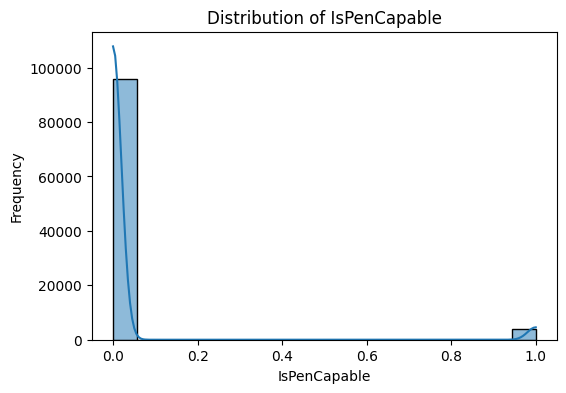

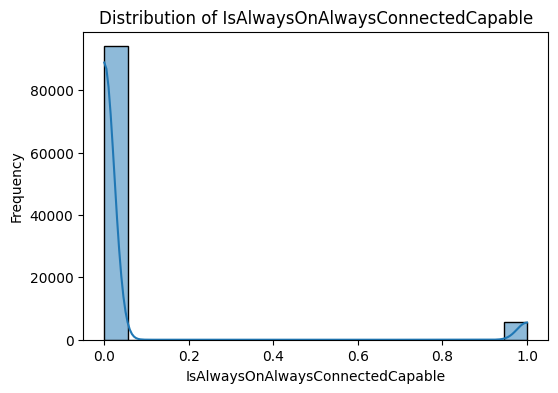

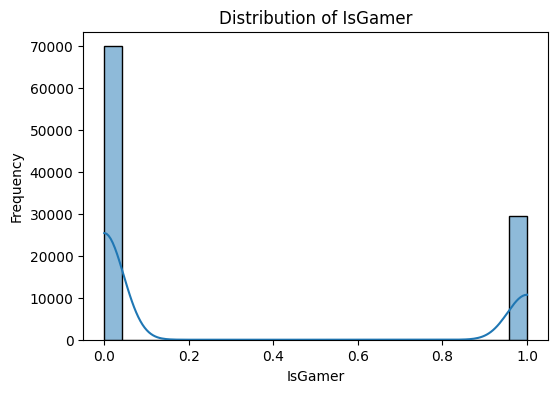

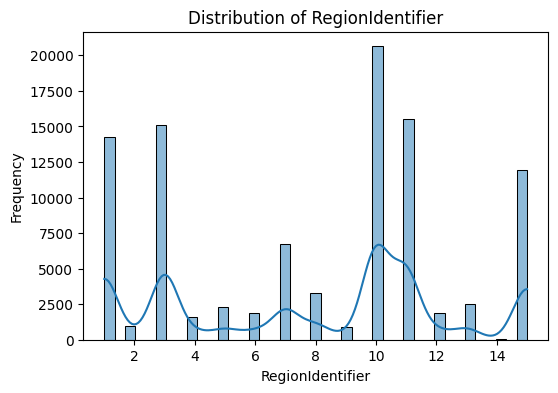

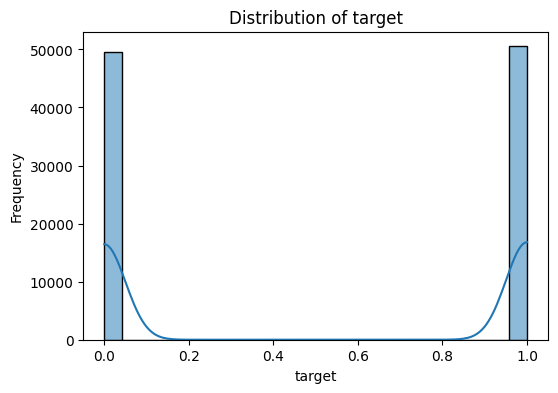

In [14]:

for col in num_col:
  plt.figure(figsize=(6, 4))
  sns.histplot(train[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


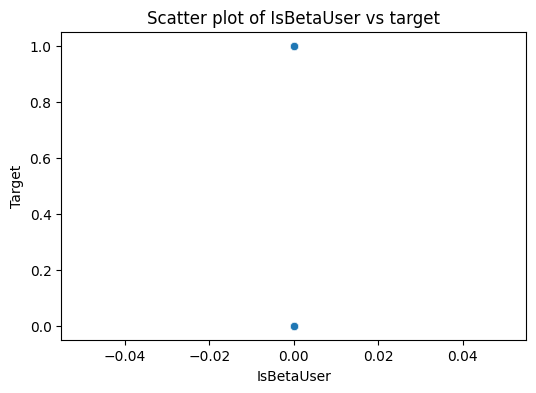

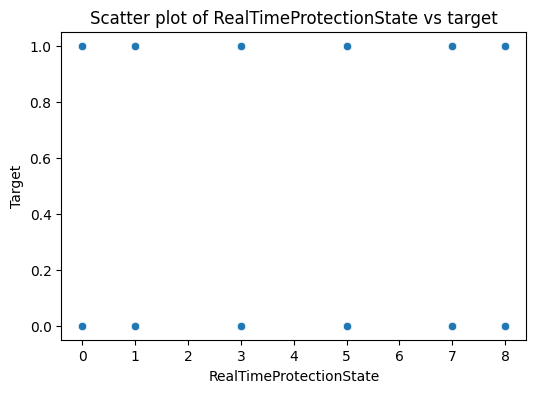

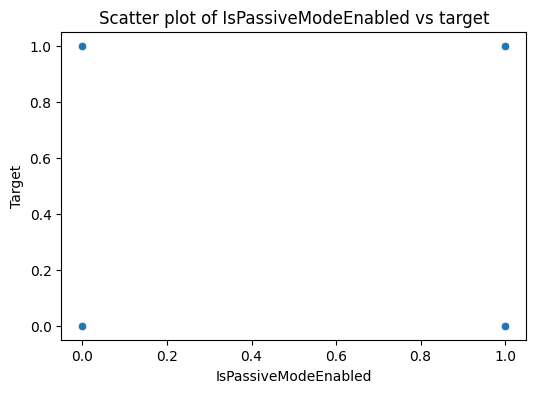

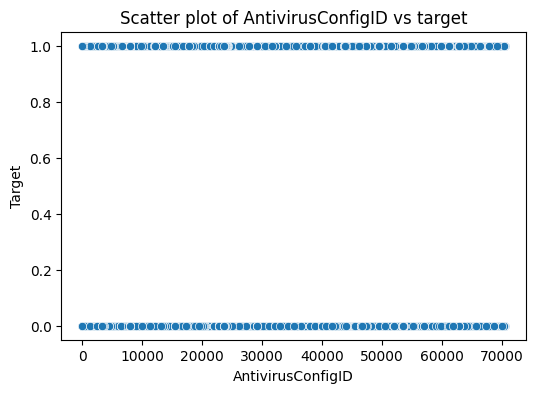

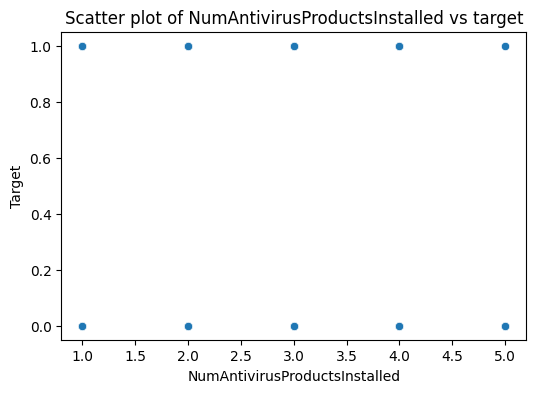

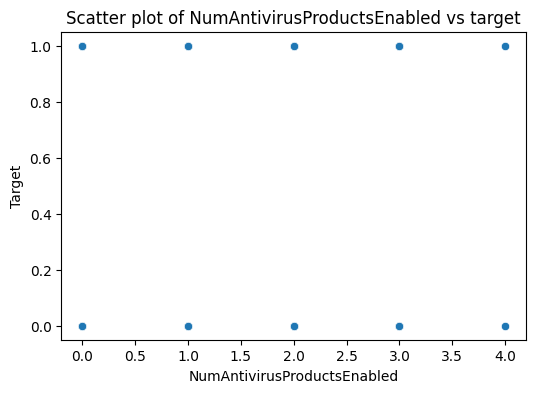

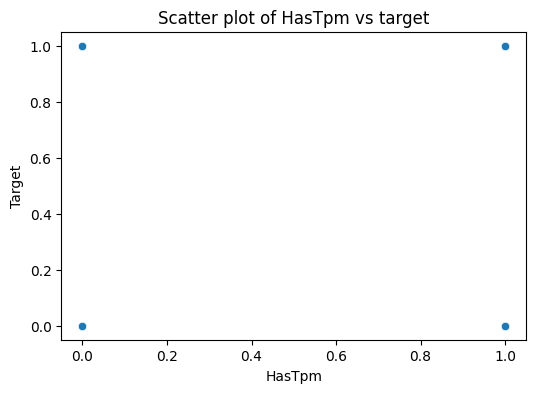

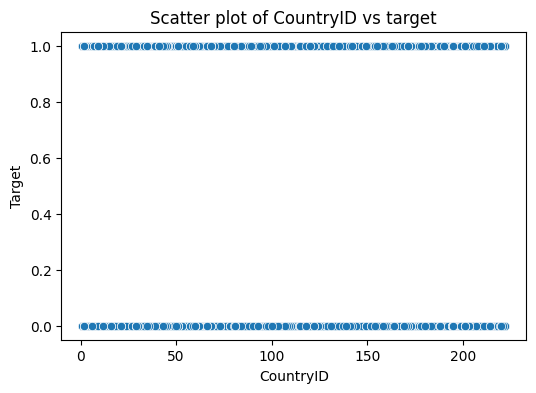

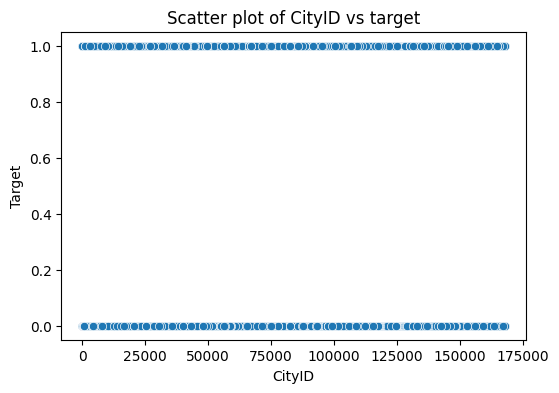

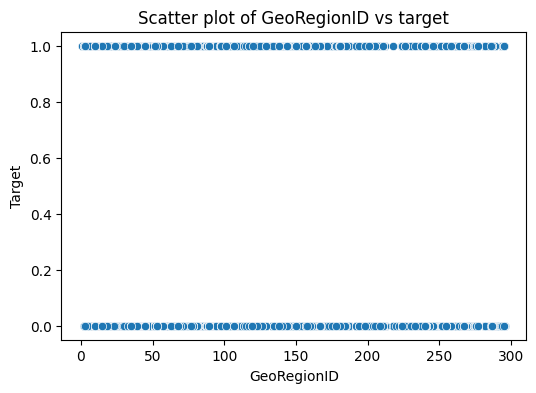

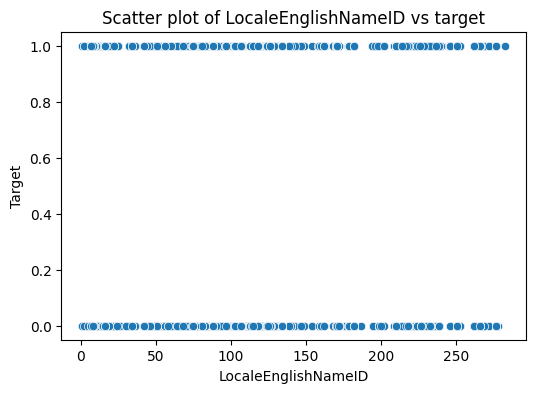

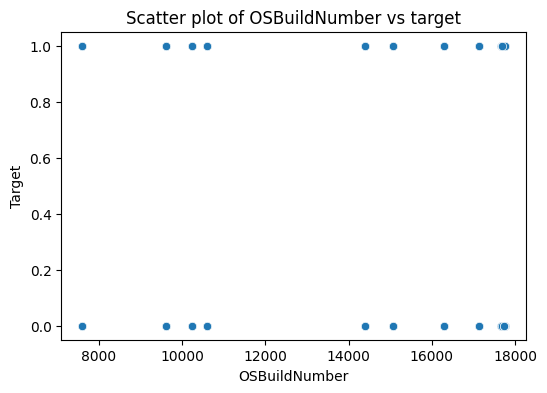

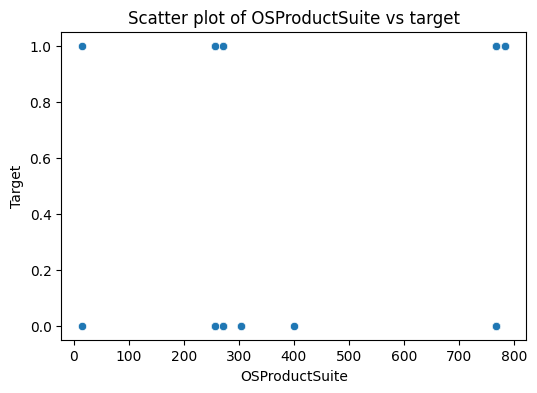

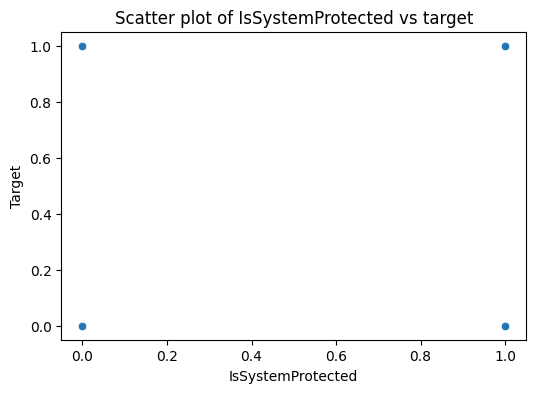

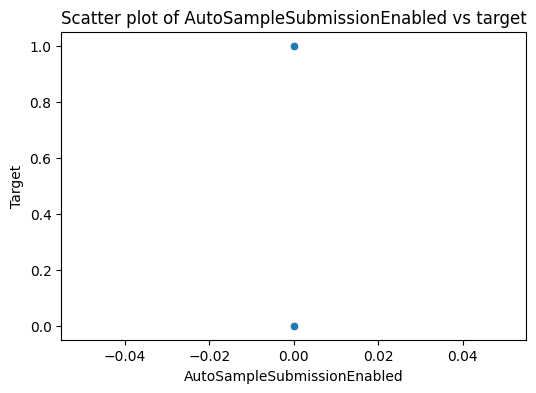

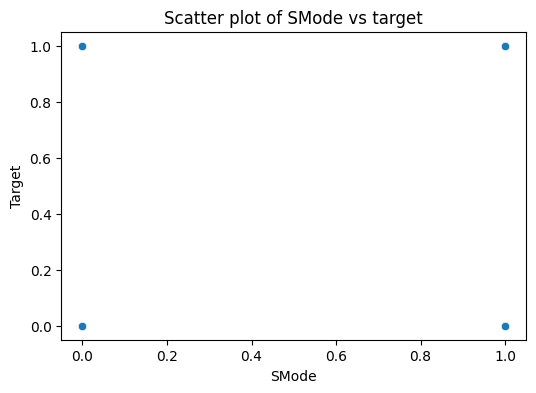

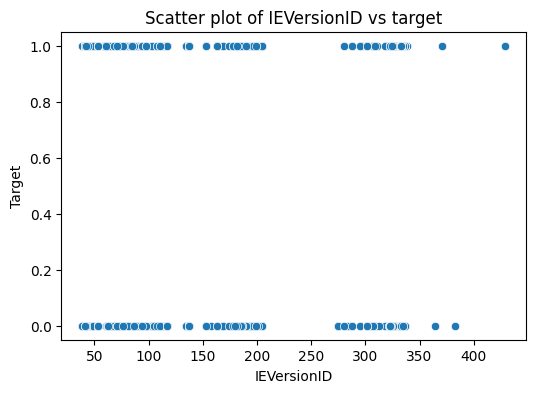

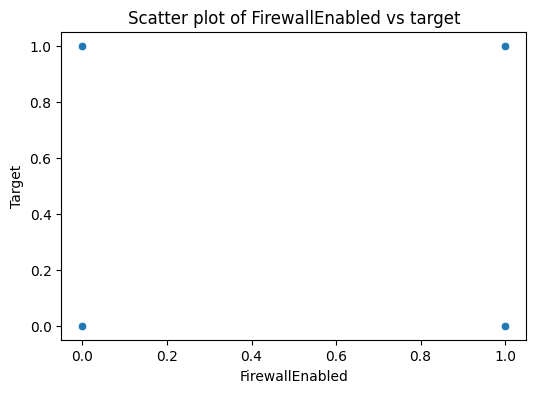

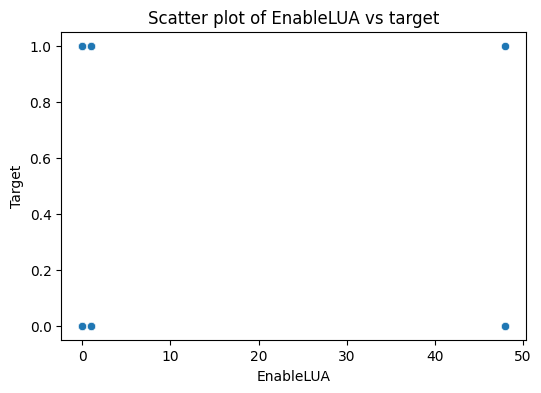

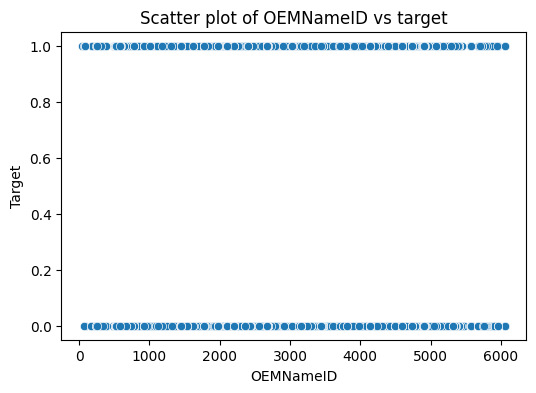

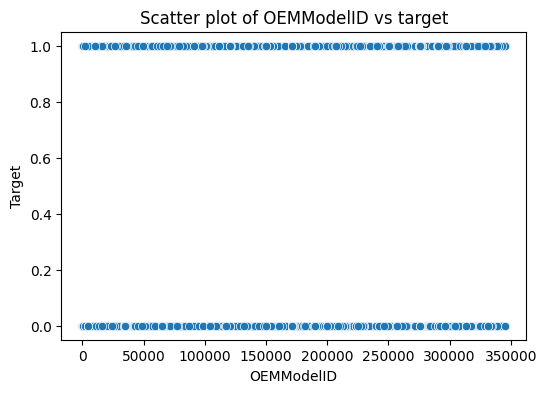

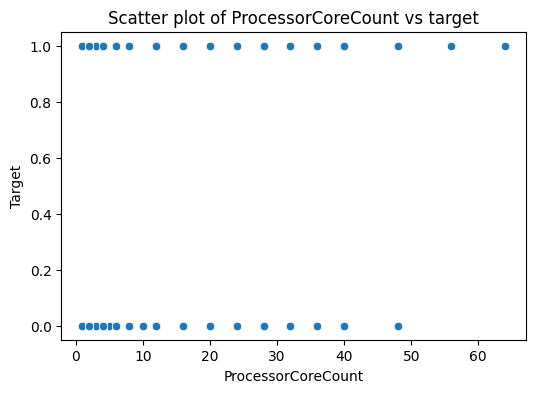

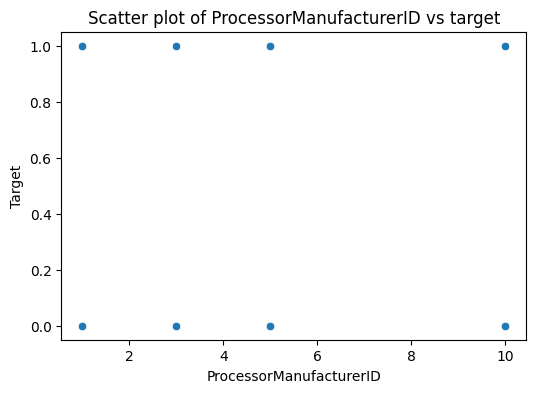

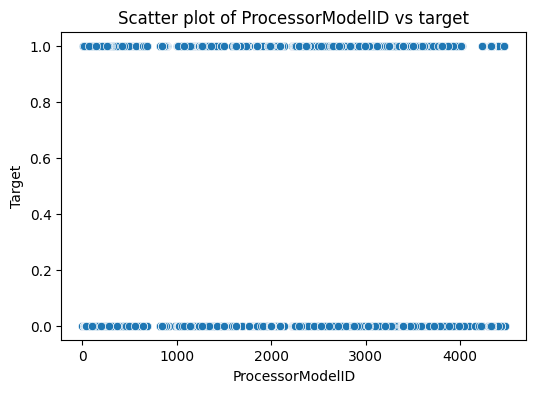

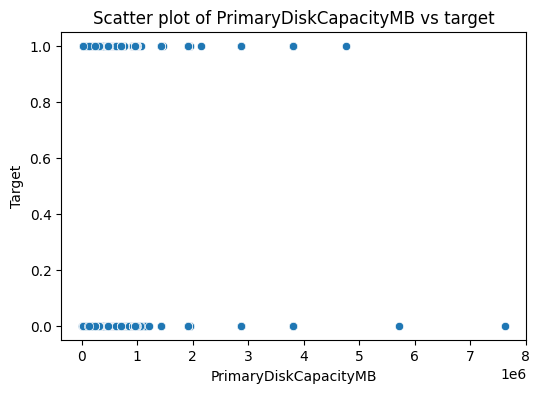

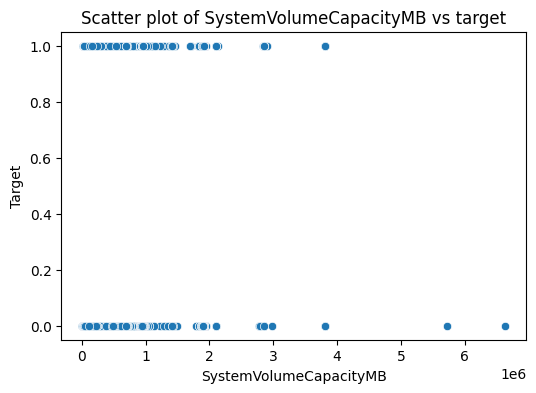

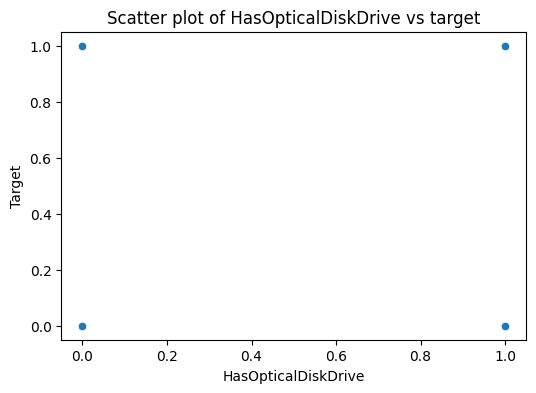

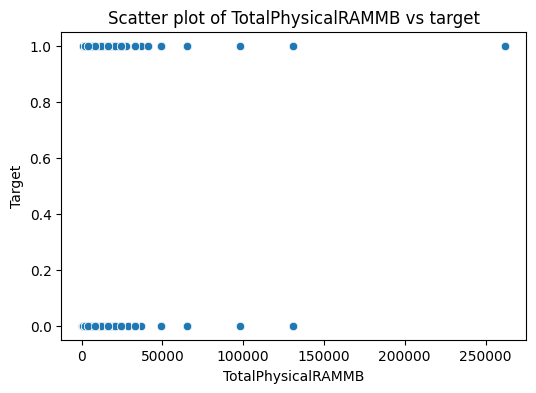

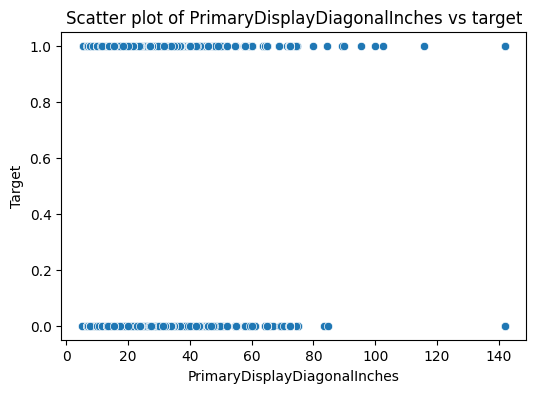

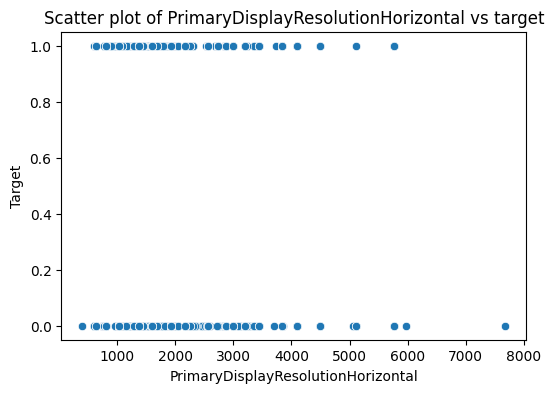

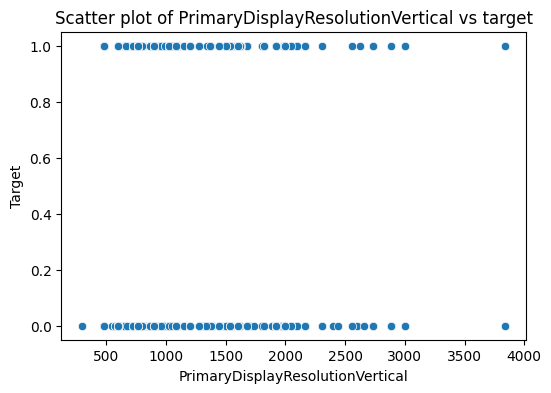

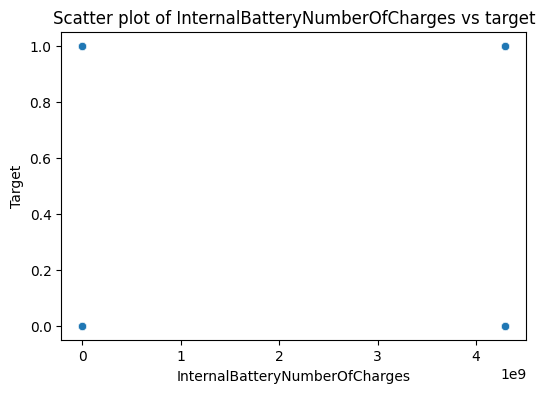

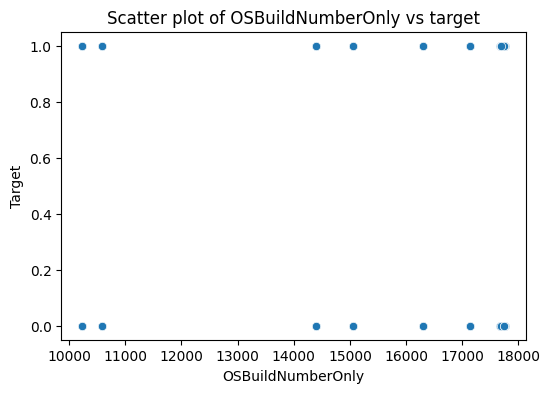

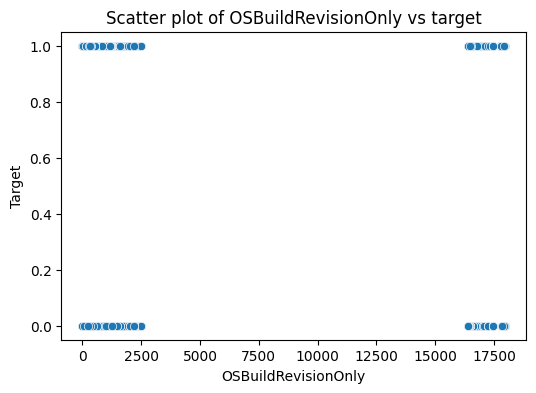

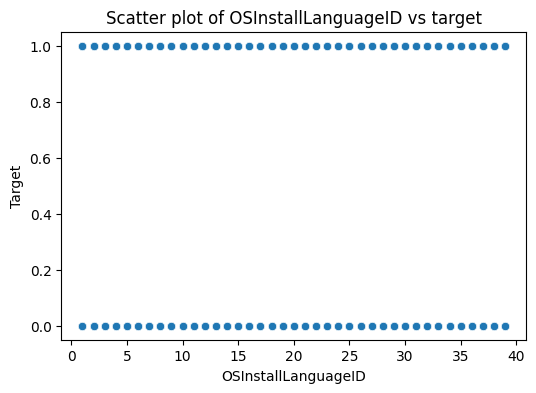

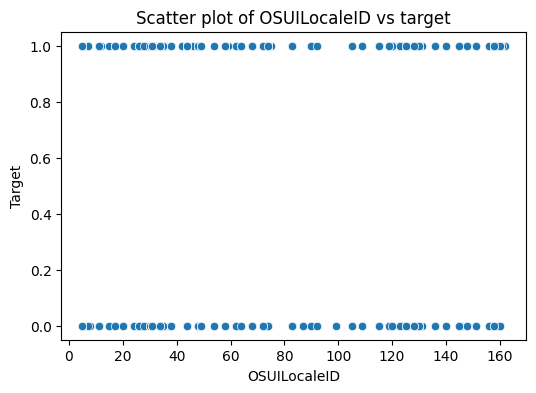

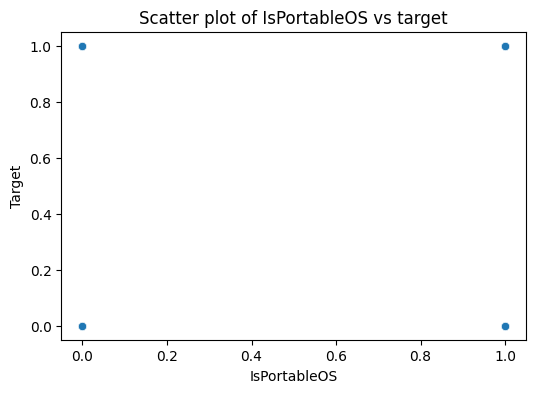

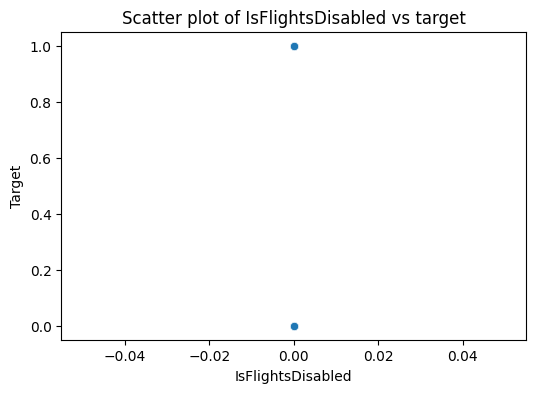

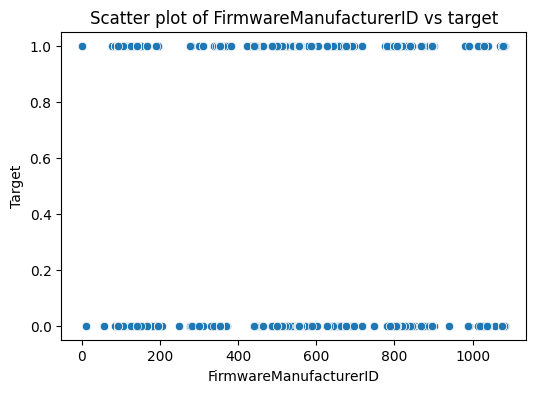

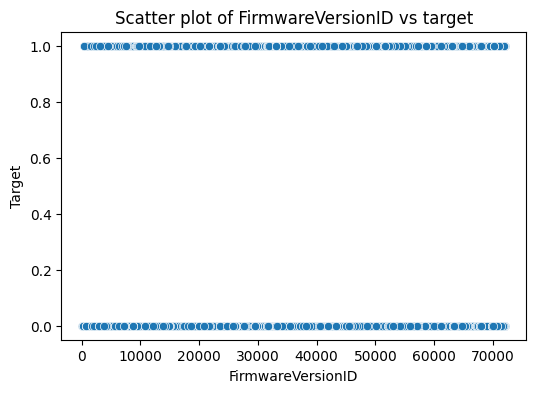

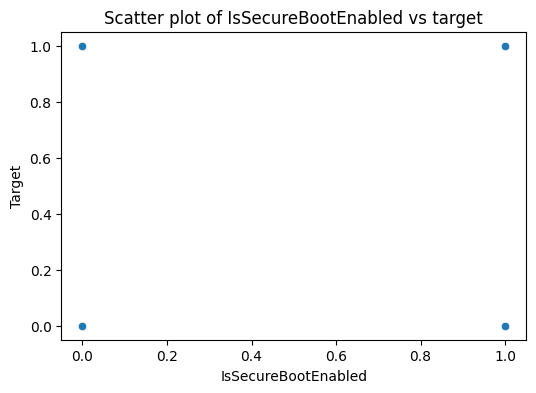

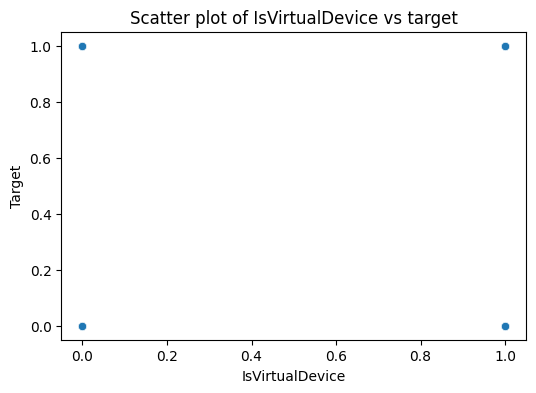

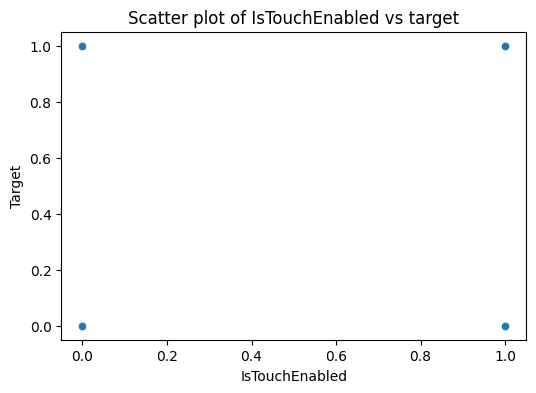

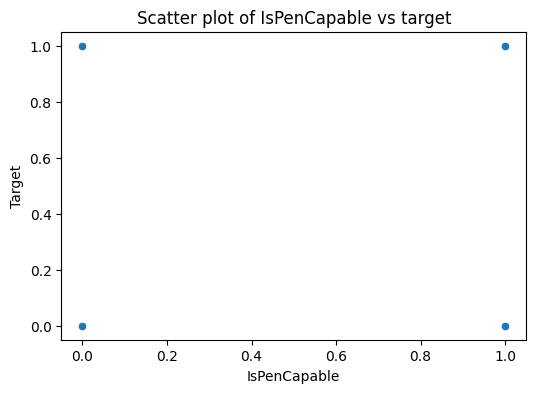

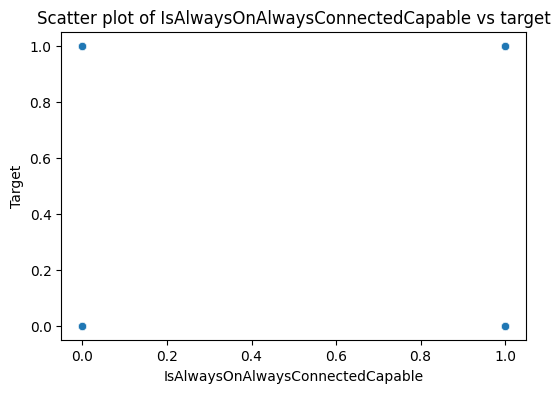

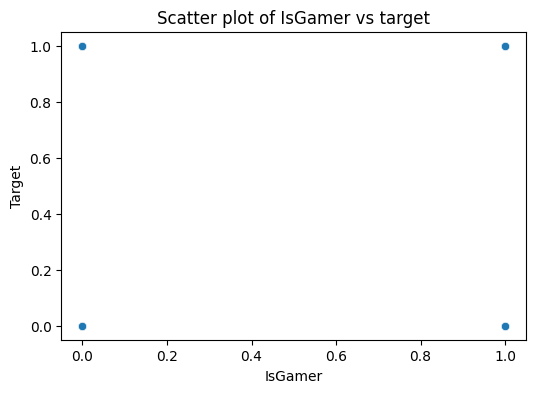

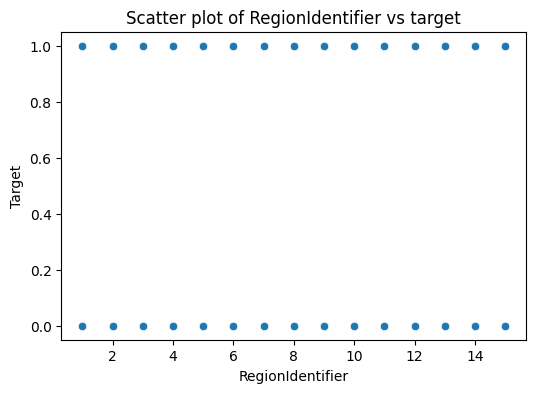

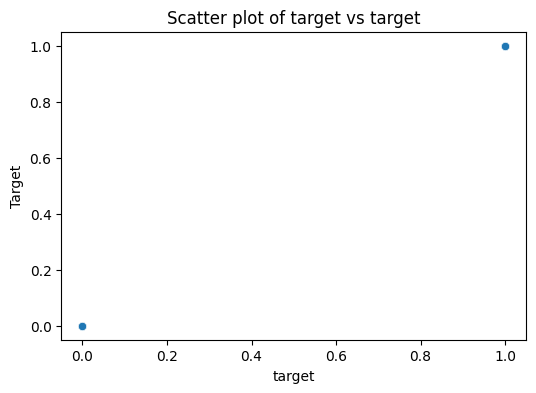

In [15]:

for col in num_col:
  plt.figure(figsize=(6, 4))
  sns.scatterplot(x=train[col], y=train['target']) # Replace 'target_column_name' with your actual target column name
  plt.title(f'Scatter plot of {col} vs target')
  plt.xlabel(col)
  plt.ylabel('Target')
  plt.show()


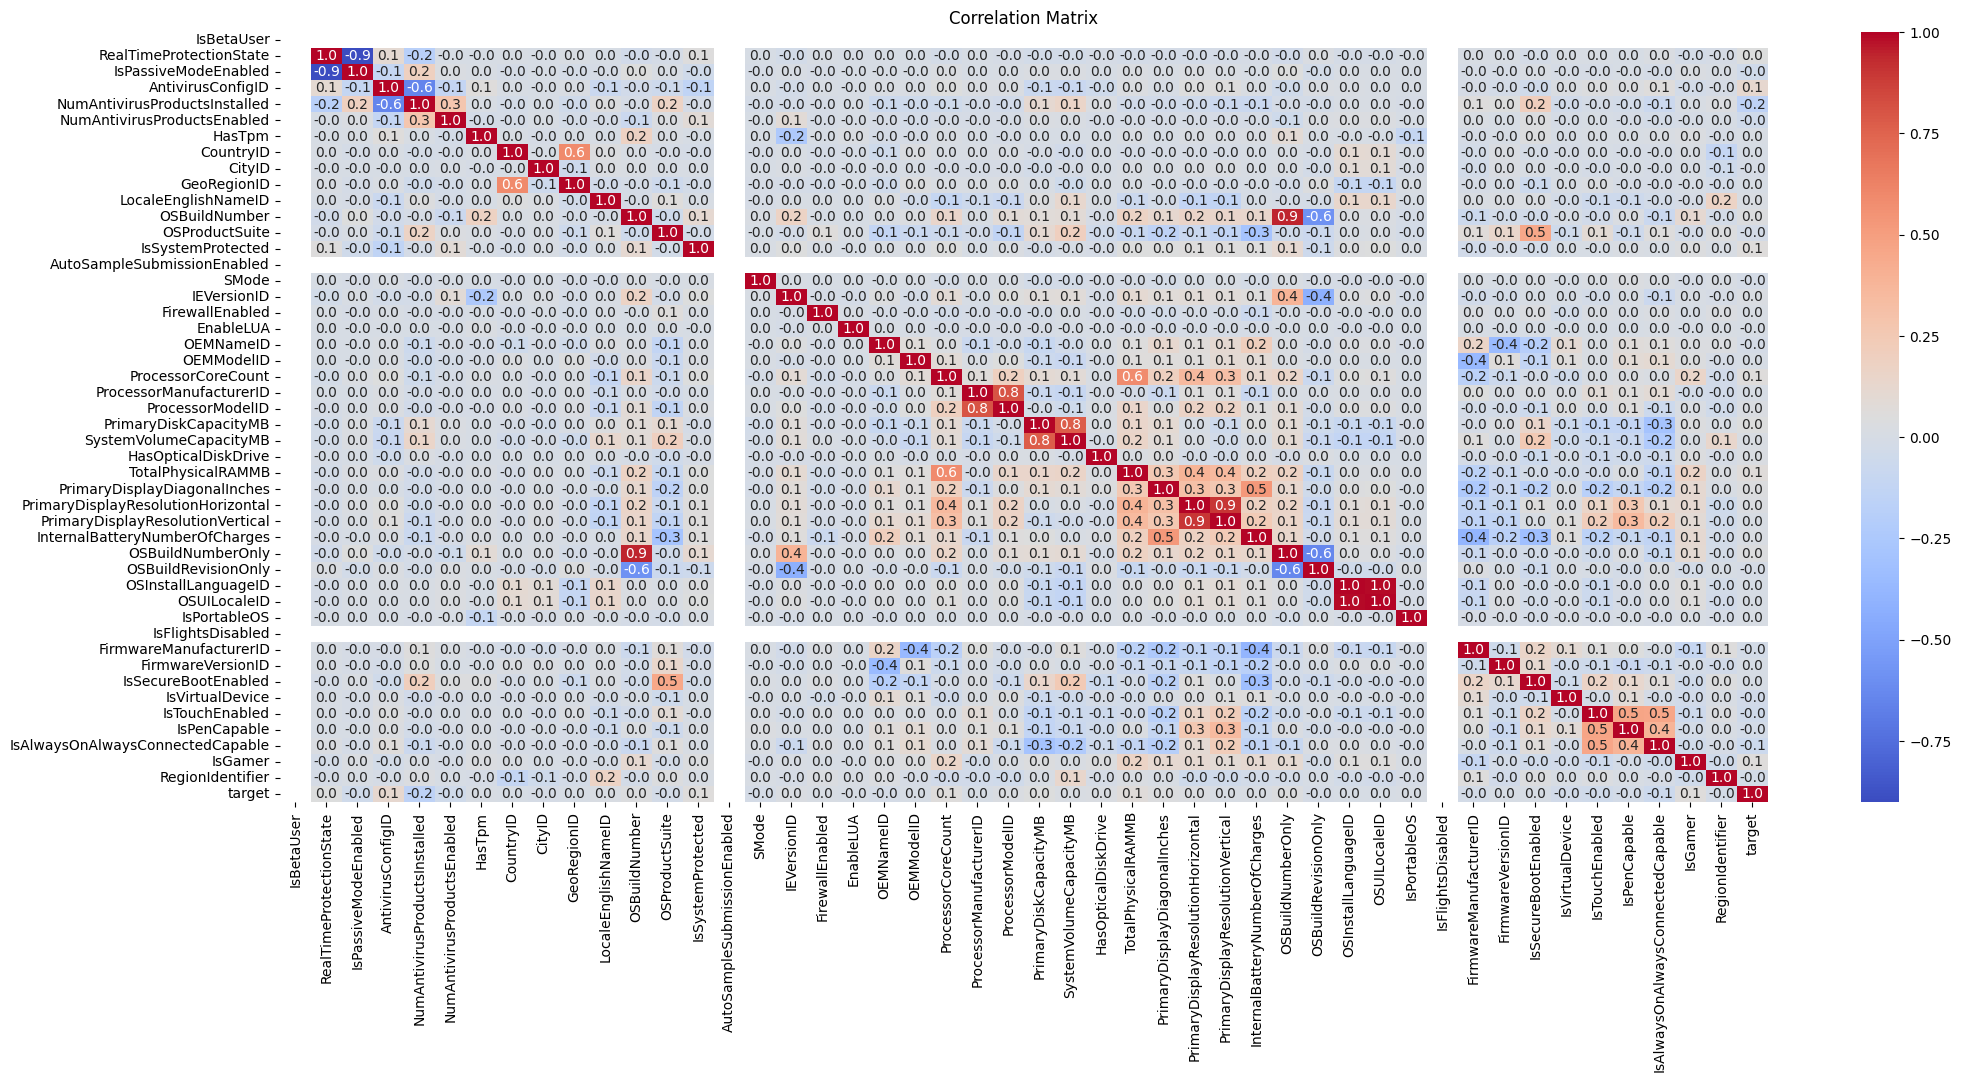

In [16]:

corr_matrix = train[num_col].corr()
plt.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()


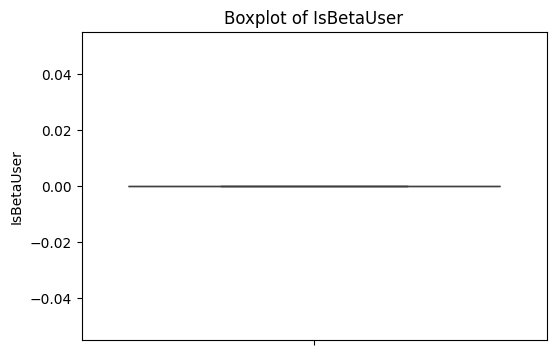

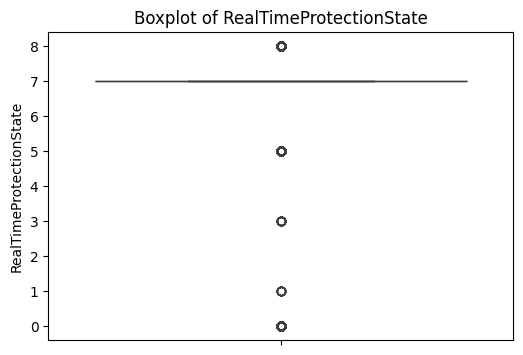

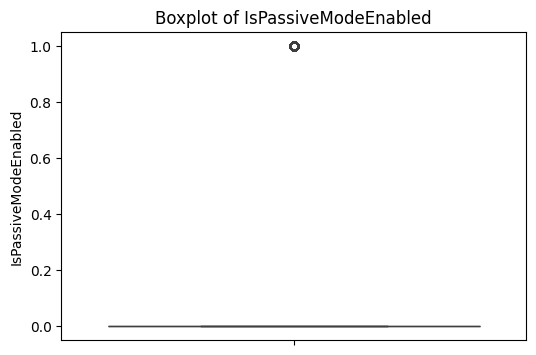

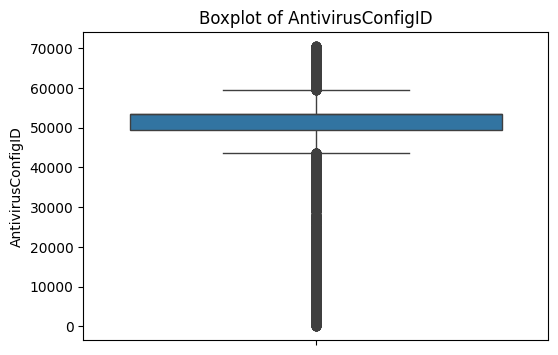

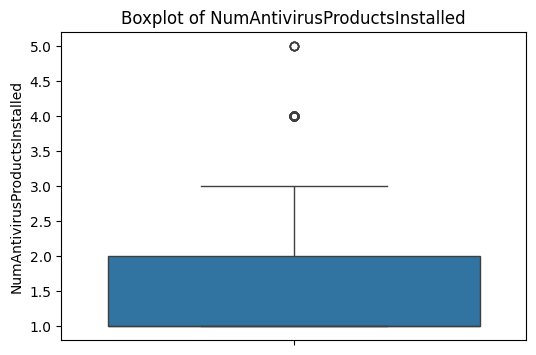

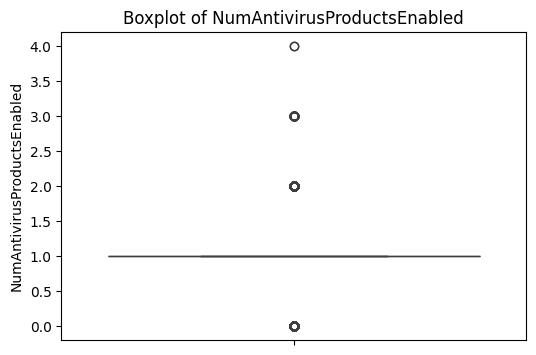

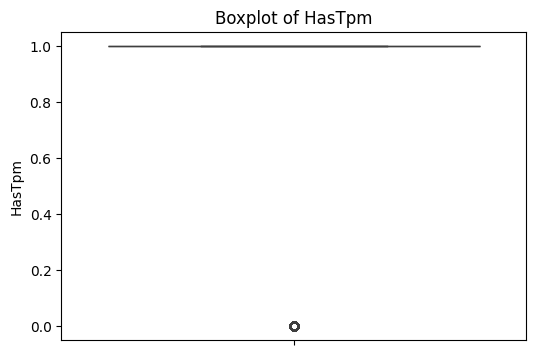

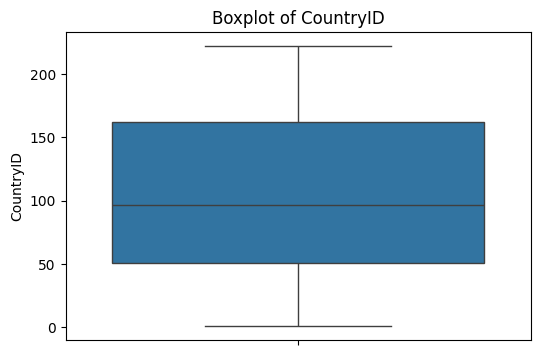

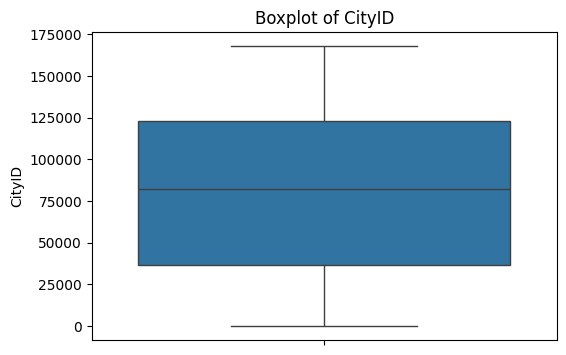

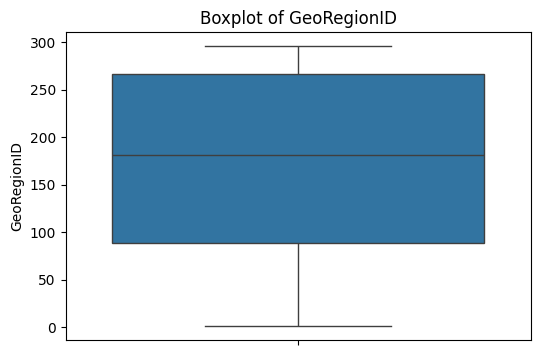

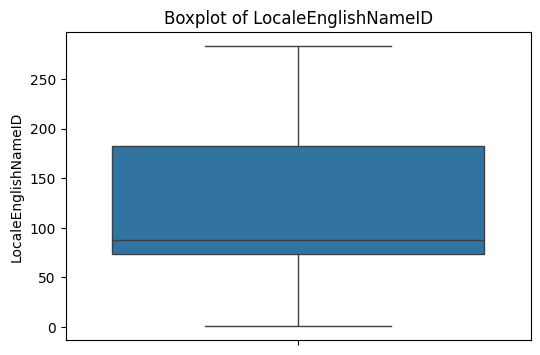

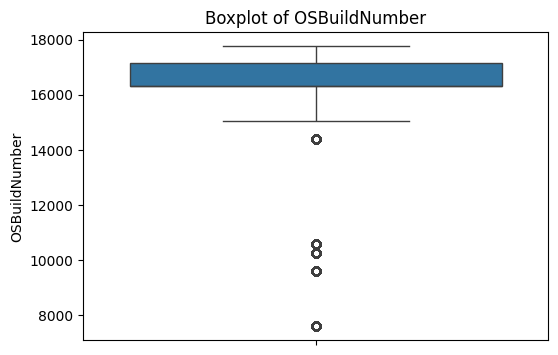

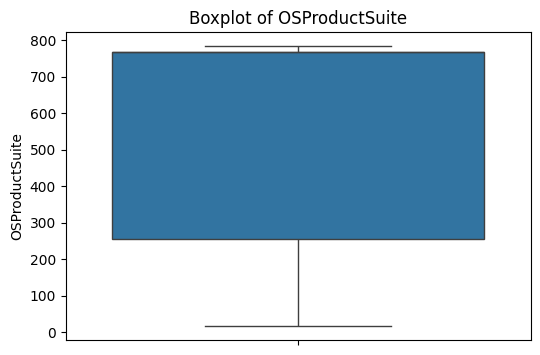

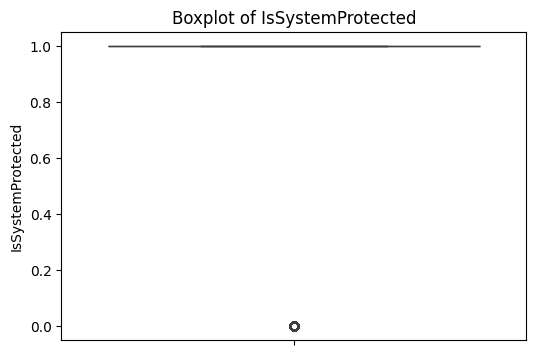

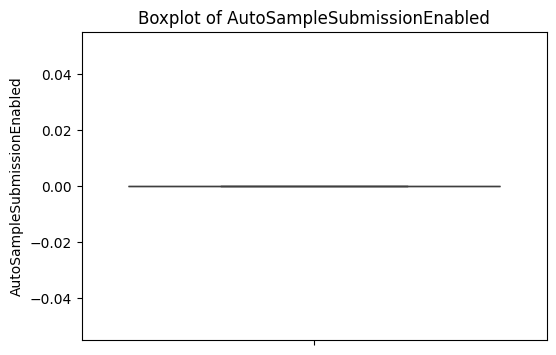

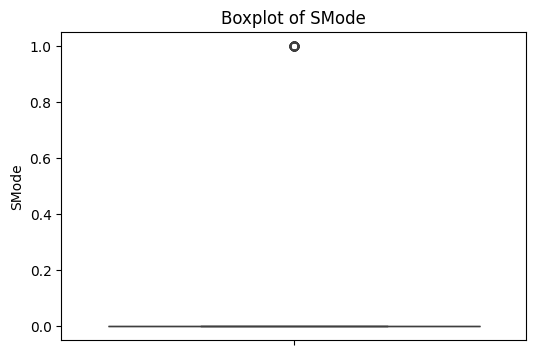

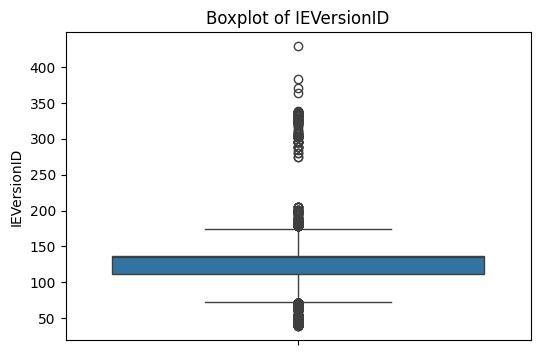

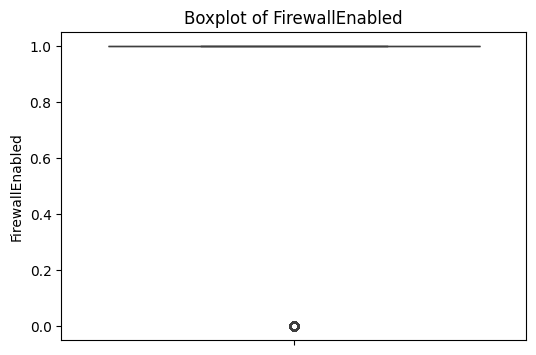

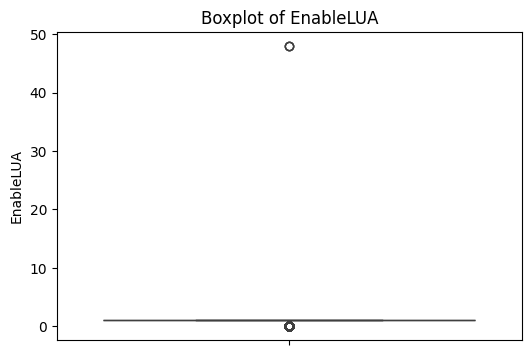

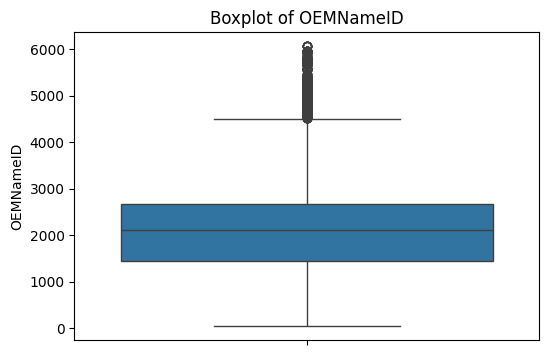

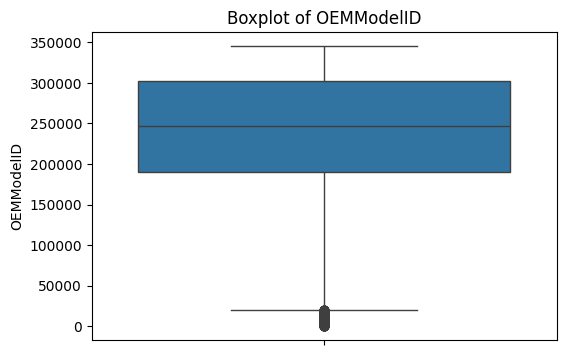

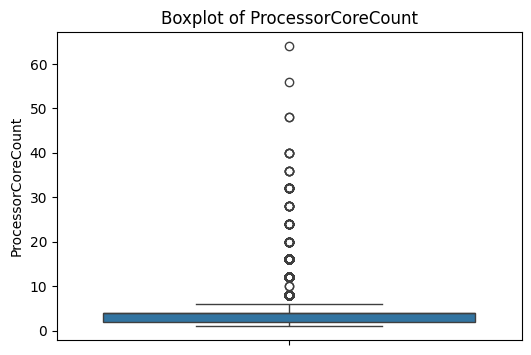

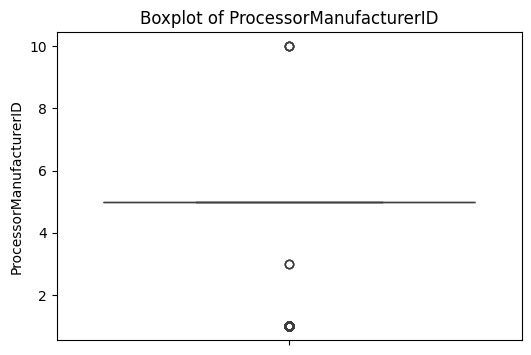

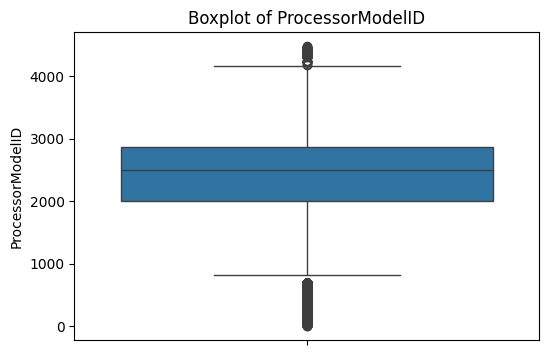

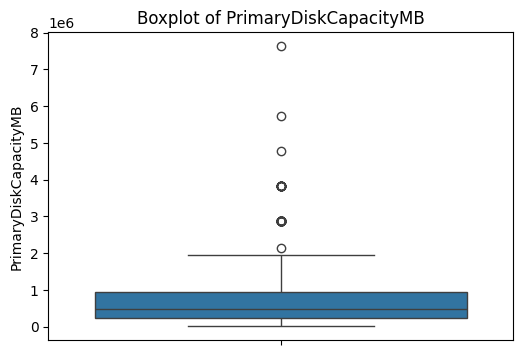

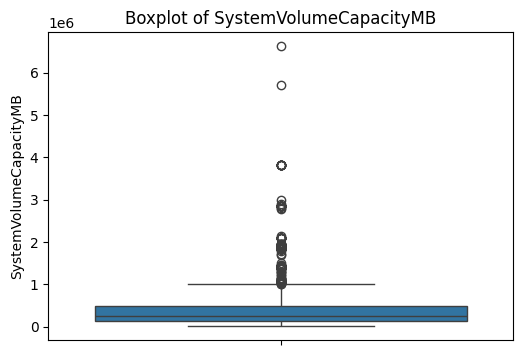

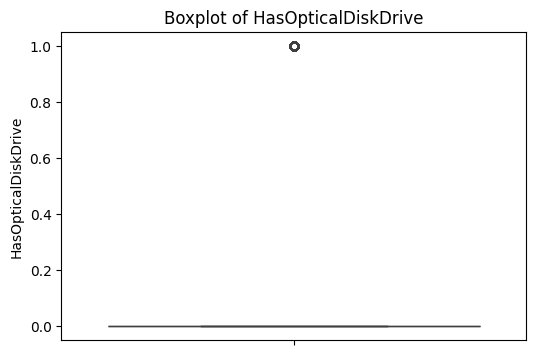

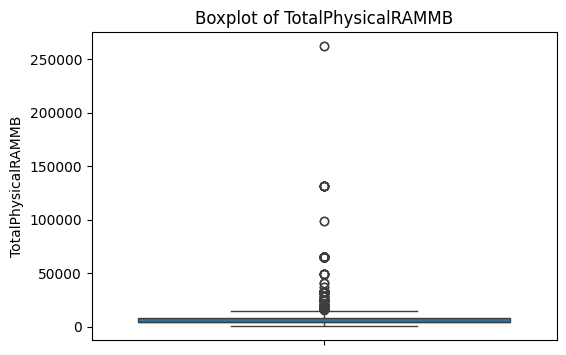

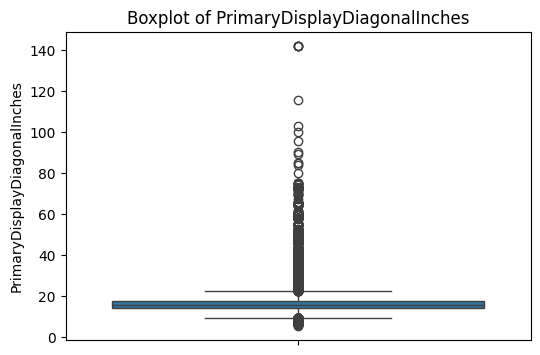

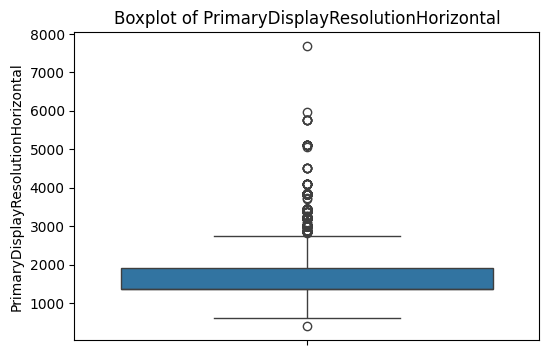

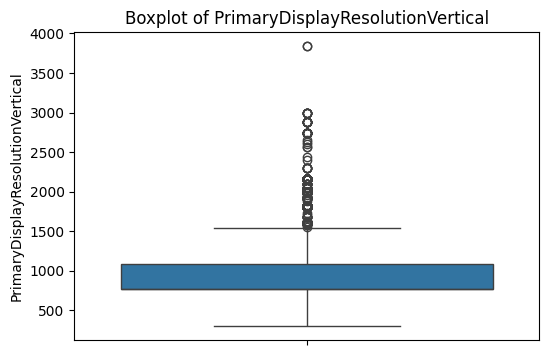

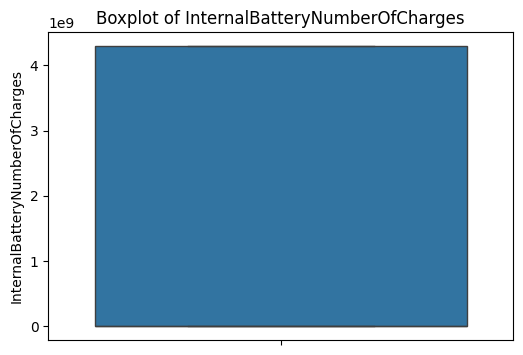

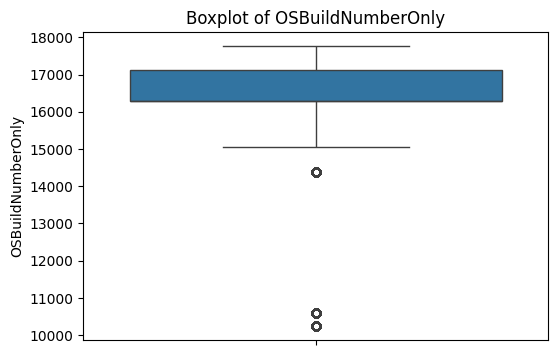

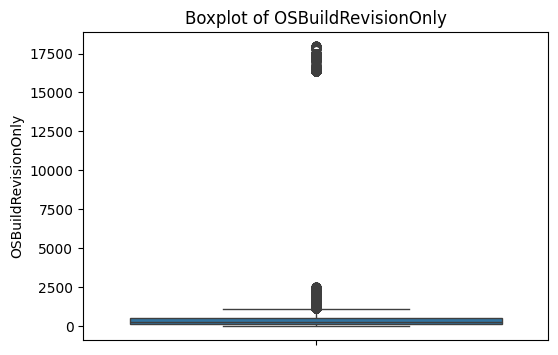

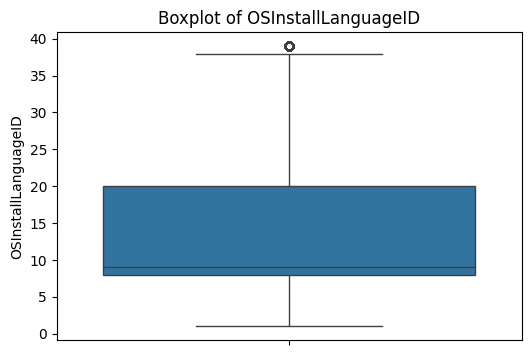

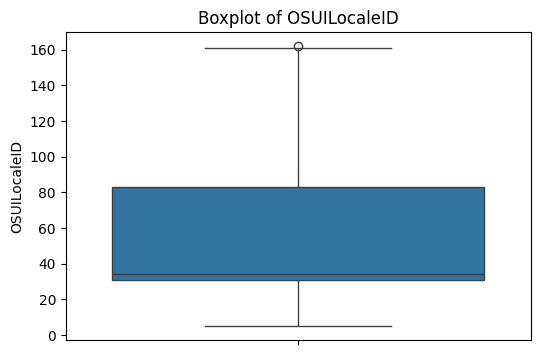

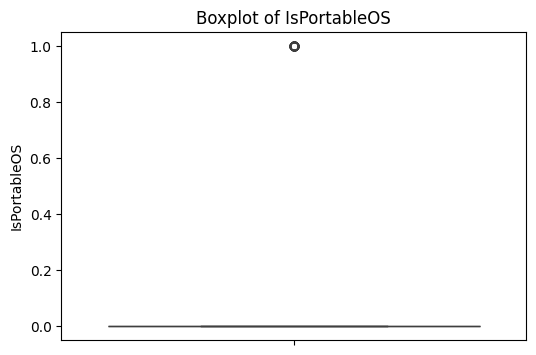

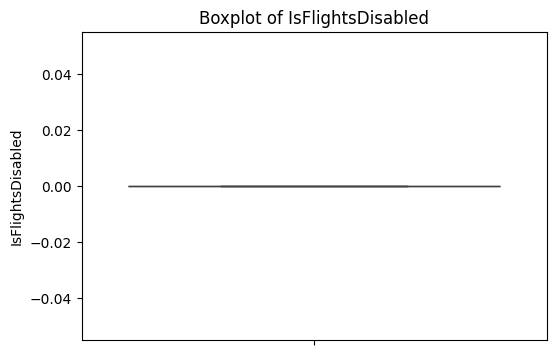

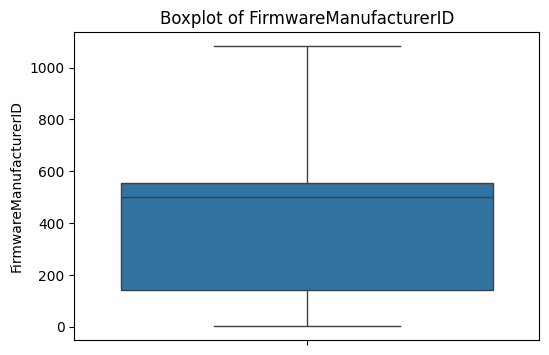

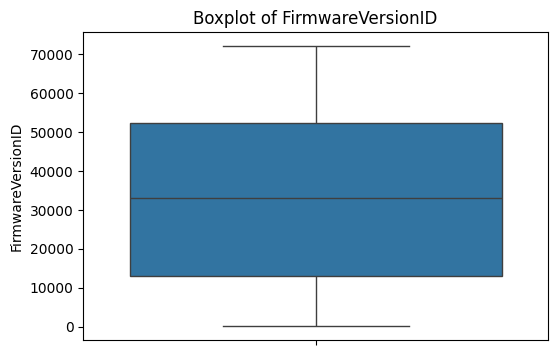

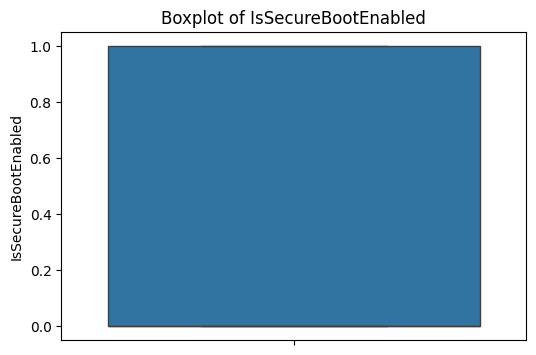

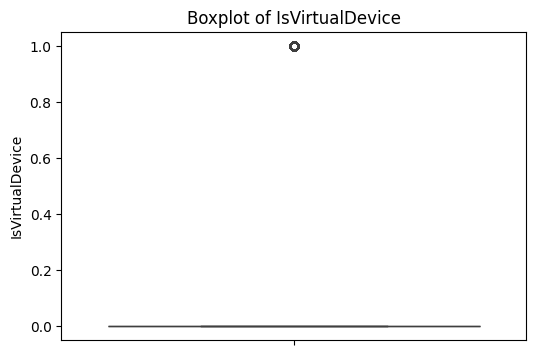

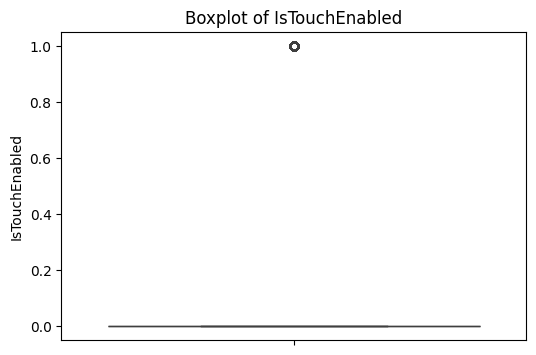

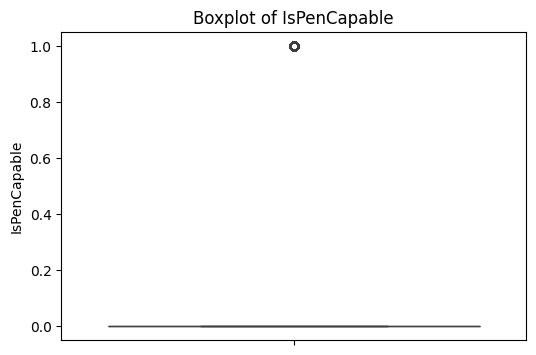

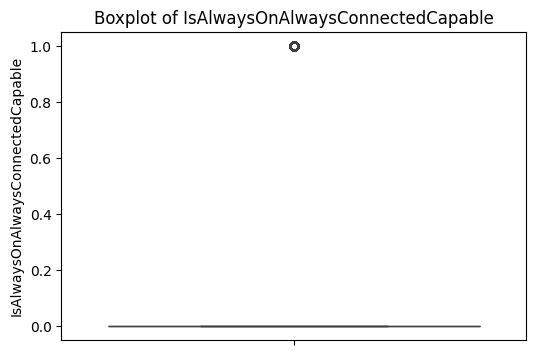

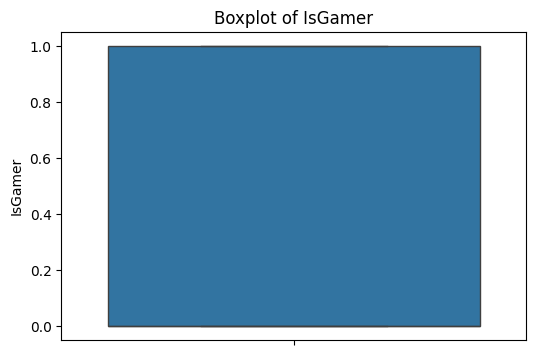

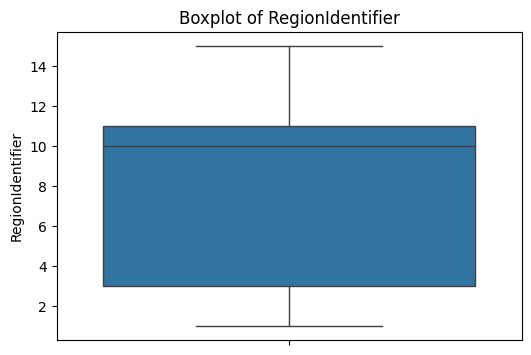

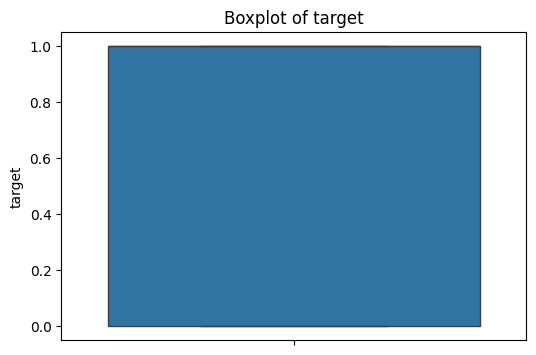

In [17]:

for col in num_col:
  plt.figure(figsize=(6, 4))
  sns.boxplot(y=train[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()


In [18]:
train_feat = train.drop('target', axis=1)
train_lab = train['target']


x_train, x_val, y_train, y_val = train_test_split(train_feat, train_lab, test_size=0.2, random_state=42,shuffle=True,stratify=train_lab) # Adjust test_size as needed

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")


Training data shape: (80000, 75)
Validation data shape: (20000, 75)


Data Cleaning/Preprocessing

In [19]:
#decreasing accuracy hence not using this
"""
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in num_col:
  train = remove_outliers_iqr(train, col)

train.shape
"""

'\ndef remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df_filtered\n\nfor col in num_col:\n  train = remove_outliers_iqr(train, col)\n\ntrain.shape\n'

In [20]:
le=LabelEncoder()
comp=pd.concat([train_feat,test_feat],axis=0)
for i in cat_col:
  le.fit(comp[i])
  x_train[i]=le.transform(x_train[i])
  x_val[i]=le.transform(x_val[i])
  test_feat[i]=le.transform(test_feat[i])

In [21]:
# Identify columns with more than 5000 unique values
cols_to_drop = train.nunique()[train.nunique() > 5000].index

# Drop the identified columns from train, x_train, x_val, and test_feat
train = train.drop(columns=cols_to_drop)
x_train = x_train.drop(columns=cols_to_drop)
x_val = x_val.drop(columns=cols_to_drop)
test_feat = test_feat.drop(columns=cols_to_drop)


In [22]:
one_unique_cols = []
for col in train.columns:
    if train[col].nunique() == 1:
        one_unique_cols.append(col)
train = train.drop(columns=one_unique_cols)
x_train = x_train.drop(columns=one_unique_cols)
x_val = x_val.drop(columns=one_unique_cols)
test_feat = test_feat.drop(columns=one_unique_cols)

cat_col = [i for i in train.columns if train[i].dtypes == 'object']
num_col = [i for i in train.columns if i not in cat_col]
num_col_except_tar = [i for i in num_col if i != 'target']

In [23]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col_except_tar),
        ('cat', categorical_transformer, cat_col)
    ])

#in dataframe
x_train_processed=pd.DataFrame(preprocessor.fit_transform(x_train))
x_val_processed=pd.DataFrame(preprocessor.transform(x_val))
test_feat_processed=pd.DataFrame(preprocessor.transform(test_feat))



In [24]:
#tried pca but reduced the accuracy a little bit but we should use pca in this case beacause there are high number of columns which is not preferred
"""
pca = PCA(n_components=0.95)

x_train_pca = pca.fit_transform(x_train_processed)

x_val_pca = pca.transform(x_val_processed)
test_feat_pca = pca.transform(test_feat_processed)
"""


'\npca = PCA(n_components=0.95)\n\nx_train_pca = pca.fit_transform(x_train_processed)\n\nx_val_pca = pca.transform(x_val_processed)\ntest_feat_pca = pca.transform(test_feat_processed)\n'

In [25]:

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.2)  # Adjust threshold as needed
x_train_selected = selector.fit_transform(x_train_processed)
x_val_selected = selector.transform(x_val_processed)
test_feat_selected = selector.transform(test_feat_processed)

# Convert back to DataFrame (optional)
x_train_selected = pd.DataFrame(x_train_selected)
x_val_selected = pd.DataFrame(x_val_selected)
test_feat_selected = pd.DataFrame(test_feat_selected)
x_train_selected.shape

(80000, 61)

Linear models

In [ ]:

log_model = LogisticRegression(random_state=42)
log_model.fit(x_train_selected, y_train)

y_pred_log = log_model.predict(x_val_selected)

accuracy = accuracy_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.58885


In [ ]:

print(classification_report(y_val, y_pred_log))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      9895
           1       0.58      0.66      0.62     10105

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.59      0.59     20000



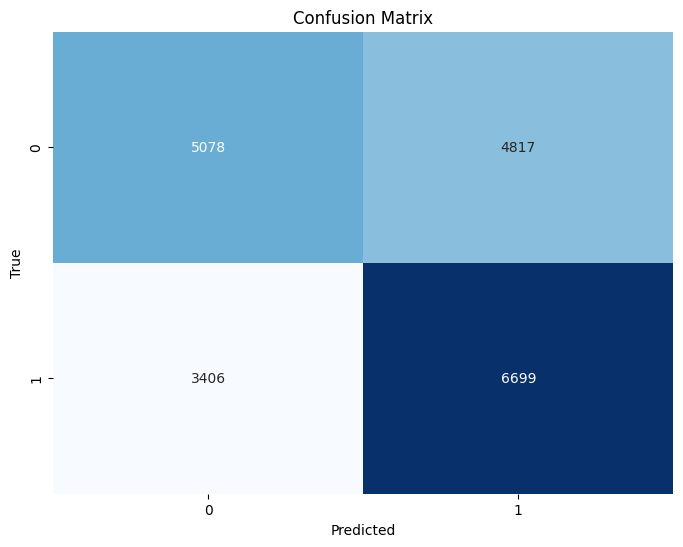

In [ ]:

cm = confusion_matrix(y_val, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'], # Algorithm to use
    'max_iter': [100,200,500], # Maximum number of iterations
}

log_model = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(estimator=log_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42) # 5-fold cross validation, 10 iterations
random_search.fit(x_train_selected, y_train)

#best params
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 1}


Logistic Regression Accuracy with best hyperparameters: 0.59915
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      9895
           1       0.59      0.68      0.63     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



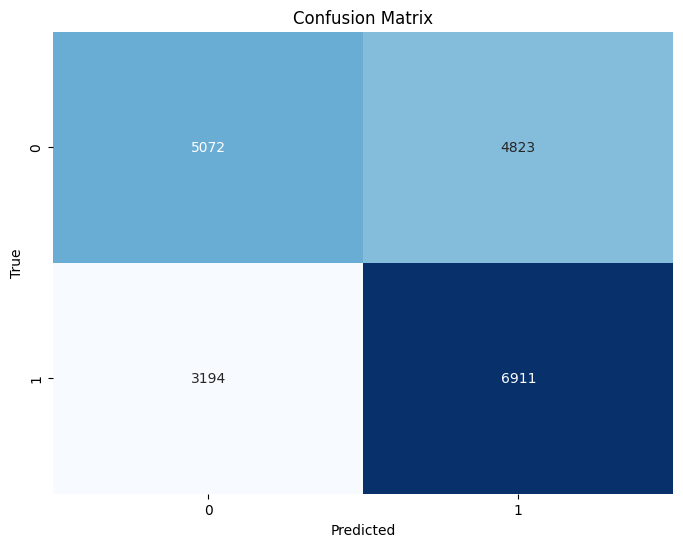

In [ ]:
# Evaluate
y_pred_log = best_model.predict(x_val_selected)
accuracy = accuracy_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy with best hyperparameters: {accuracy}")
print(classification_report(y_val, y_pred_log))

cm = confusion_matrix(y_val, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [26]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_selected, y_train)
y_pred_rf = rf_model.predict(x_val_selected)

accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.61835


In [27]:
print(classification_report(y_val, y_pred_rf))




              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9895
           1       0.62      0.63      0.63     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



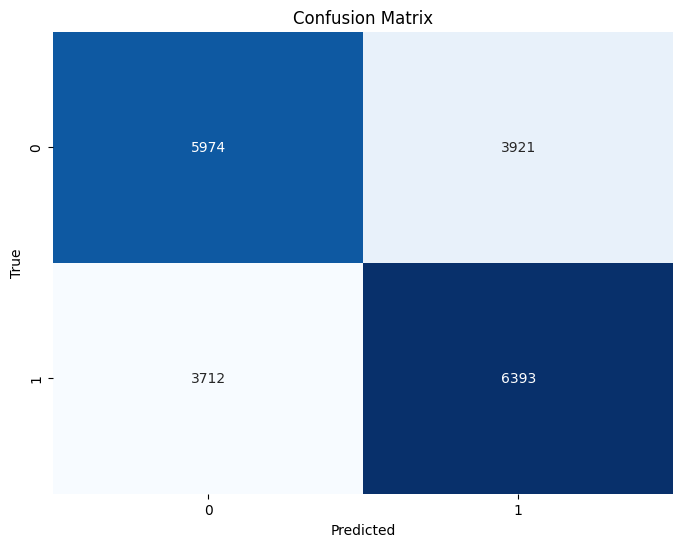

In [28]:
cm = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [29]:

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(x_train_selected, y_train)

best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")


Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}


Random Forest Accuracy with best hyperparameters: 0.621
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



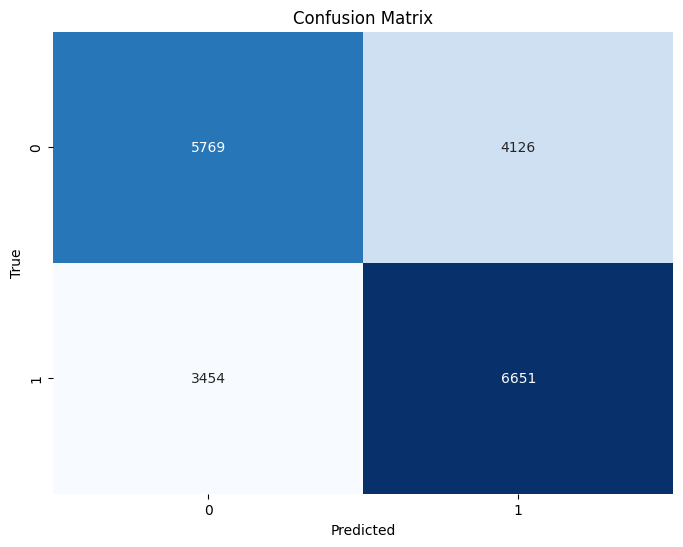

In [30]:

# Evaluate
y_pred_rf = best_model_rf.predict(x_val_selected)
accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy with best hyperparameters: {accuracy}")
print(classification_report(y_val, y_pred_rf))

cm = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [31]:
cvs=cross_val_score(best_model_rf,x_train_selected,y_train,cv=5)
print(cvs)
print(cvs.mean())

[0.6205    0.6226875 0.62325   0.6135625 0.623    ]
0.6205999999999999


MLP Accuracy: 0.5966
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      9895
           1       0.62      0.53      0.57     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.59     20000



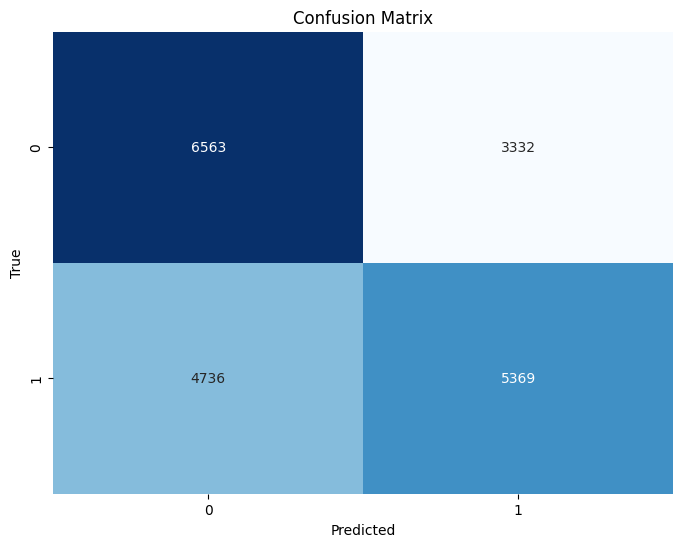

In [32]:
mlp_model = MLPClassifier(random_state=42) # Initialize the MLPClassifier
mlp_model.fit(x_train_selected, y_train) # Train the model
y_pred_mlp = mlp_model.predict(x_val_selected) # Make predictions on the validation set

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_mlp)
print(f"MLP Accuracy: {accuracy}")
print(classification_report(y_val, y_pred_mlp))

cm = confusion_matrix(y_val, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
mlp_roc_auc = roc_auc_score(y_val, mlp_model.predict_proba(x_val_selected)[:, 1]) # Assuming binary classification
print(f"MLP - ROC AUC: {mlp_roc_auc:.4f}")

MLP - ROC AUC: 0.6361


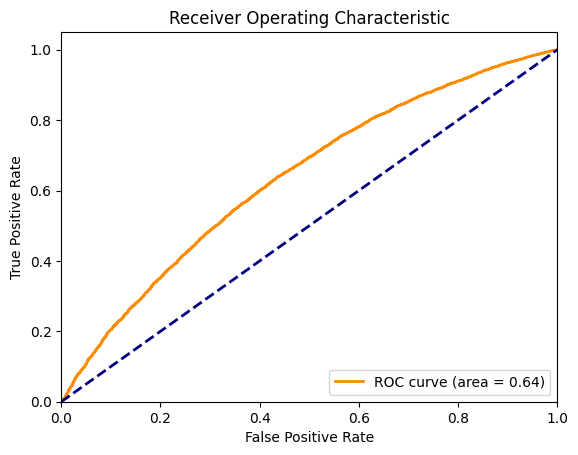

In [ ]:
y_pred_prob = mlp_model.predict_proba(x_val_selected)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

random_search_mlp = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_grid_mlp, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_mlp.fit(x_train_selected, y_train)

best_params_mlp = random_search_mlp.best_params_
best_model_mlp = random_search_mlp.best_estimator_
print(f"Best Hyperparameters for MLP: {best_params_mlp}")


Best Hyperparameters for MLP: {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'logistic'}


MLP Accuracy with best hyperparameters: 0.59355
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      9895
           1       0.57      0.78      0.66     10105

    accuracy                           0.59     20000
   macro avg       0.61      0.59      0.58     20000
weighted avg       0.61      0.59      0.58     20000



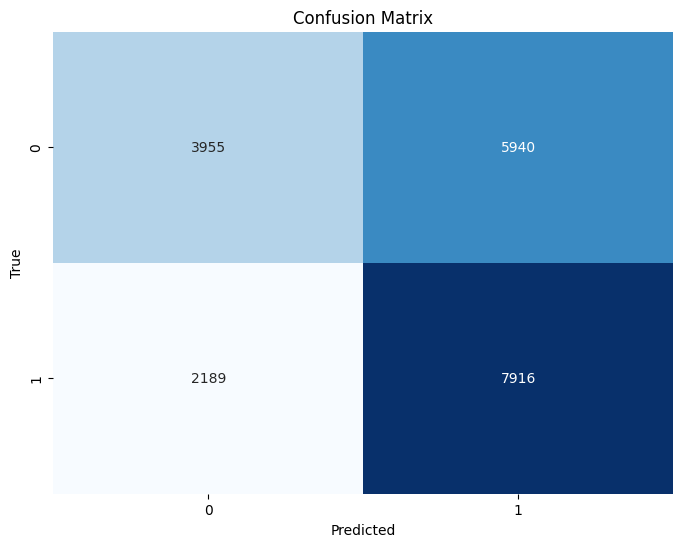

In [ ]:

# Evaluate the best MLP model
y_pred_mlp = best_model_mlp.predict(x_val_selected)
accuracy = accuracy_score(y_val, y_pred_mlp)
print(f"MLP Accuracy with best hyperparameters: {accuracy}")
print(classification_report(y_val, y_pred_mlp))

cm = confusion_matrix(y_val, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


XGBoost Accuracy: 0.6231
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



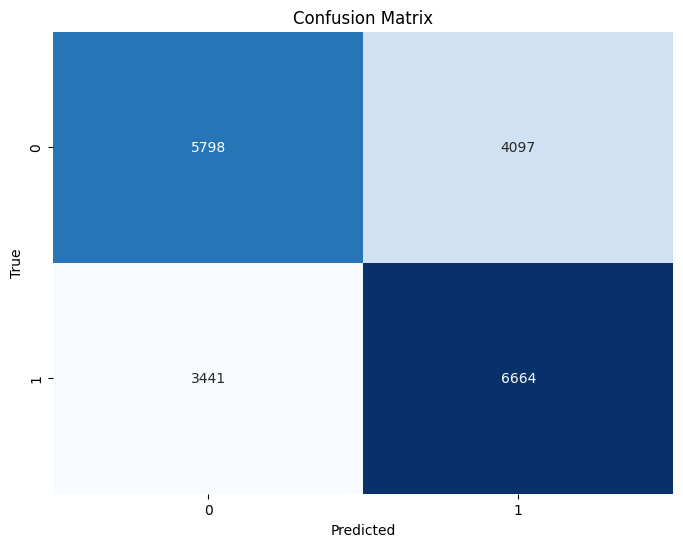

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train_selected, y_train)
y_pred_xgb = xgb_model.predict(x_val_selected)

accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy}")

print(classification_report(y_val, y_pred_xgb))

cm = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


best_xgb=XGBClassifier(subsample = 0.9, n_estimators= 1000, min_child_weight= 7, max_depth= 9, learning_rate= 0.01, gamma= 0.3, colsample_bytree= 0.9)


In [ ]:


param_grid_xgb = {
    'n_estimators': [500,1000],
    'max_depth': [6, 9, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0.2, 0.3, 0.4],
    'min_child_weight': [5, 7, 9]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_xgb.fit(x_train_selected, y_train)

best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")



Best Hyperparameters for XGBoost: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 9, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}


XGBoost Accuracy with best hyperparameters: 0.62875
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      9895
           1       0.62      0.68      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



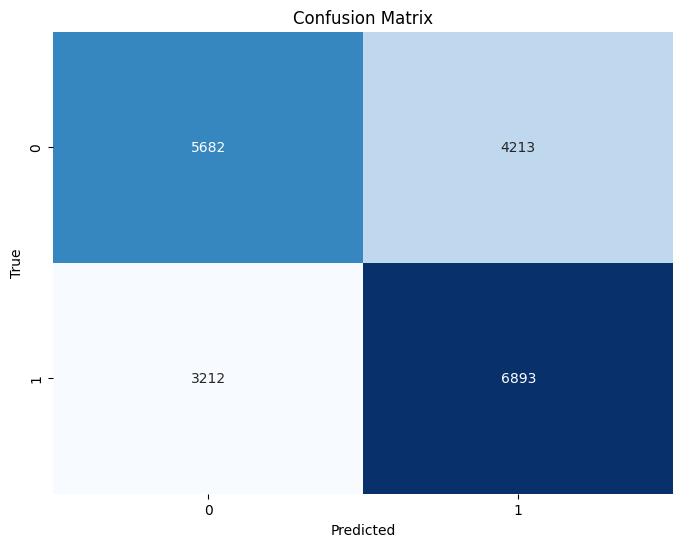

In [ ]:

# Evaluate the best XGBoost model
y_pred_xgb = best_model_xgb.predict(x_val_selected)
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy with best hyperparameters: {accuracy}")
print(classification_report(y_val, y_pred_xgb))

cm = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

best_xgb=XGBClassifier(subsample = 0.9, n_estimators= 1000, min_child_weight= 7, max_depth= 9, learning_rate= 0.01, gamma= 0.3, colsample_bytree= 0.9)
best_xgb.fit(x_train_processed,y_train)
pred=best_xgb.predict(x_val_processed)
accuracy_score(pred,y_val)


0.62905

In [ ]:

#best result
best_xgb=XGBClassifier(subsample = 0.9, n_estimators= 2000, min_child_weight= 7, max_depth= 9, learning_rate= 0.01, gamma= 0.5, colsample_bytree= 0.9)
best_xgb.fit(x_train_processed,y_train)
pred=best_xgb.predict(x_val_processed)
accuracy_score(pred,y_val)


0.6276

In [ ]:

#best result till now
best_xgb=XGBClassifier(subsample = 0.9, n_estimators= 2000, min_child_weight= 7, max_depth= 9, learning_rate= 0.01, gamma= 0.5, colsample_bytree= 0.9)
best_xgb.fit(x_train_selected,y_train)
pred=best_xgb.predict(x_val_selected)
accuracy_score(pred,y_val)


0.62675

In [ ]:
# StackingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', best_model_rf),  # Use the best Random Forest model from your tuning
    ('xgb', best_model_xgb), # Use the best XGBoost model from your tuning
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    stack_method='auto'
)

stacking_model.fit(x_train_selected, y_train)
y_pred_stacking = stacking_model.predict(x_val_selected)

accuracy_stacking = accuracy_score(y_val, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

Stacking Classifier Accuracy: 0.62915
